- 나눔글꼴 설치 및 적용
    - 설치 후 런타임 재시작 필요

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

- 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [1] 모듈 로드

In [ ]:
# os
import os
import sys
import re
import warnings
import random

# 분석
import pandas as pd
import numpy as np


# 시각화
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# ML
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.preprocessing import LabelEncoder, MinMaxScaler




warnings.filterwarnings('ignore')
%matplotlib inline

- 시드 고정

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(22) # Seed 고정

# [2] 데이터 로드

- bank_info_df : 은행 기초재무정보주요경영지표
- dp_df : 은행/저축은행 예금상품 전체

In [ ]:
#customer_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/★ 한석 ★/data/금융상품_이용현황_설문지(응답) - 설문지응답결과.csv', encoding = 'utf-8')
customer_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/★ 한석 ★/data/금융상품_이용현황_설문지(응답)_전처리.csv', encoding = 'utf-8')

customer_df.shape

(160, 33)

In [ ]:
customer_df

# [3] 데이터 전처리 및 시각화

In [ ]:
post_customer_df = pd.DataFrame() # 후처리 이후
pre_customer_df = customer_df.copy() # 전처리용 데이터프레임

# ID값 부여
post_customer_df['ID'] = list(range(0,160))
pre_customer_df['ID'] = list(range(0,160))

## 3-1. 미사용 칼럼 제거

## 인적사항

In [ ]:
pre_customer_df.columns

Index(['타임스탬프', '전화번호를 작성해주세요.(선택)', '귀하의 성별을 선택해주세요.',
       '귀하의 출생년도를 작성해주세요.\n예시) 1999', '귀하의 직업군을 선택해주세요.(소득관련)', '직업군_전처리',
       '귀하의 현재 거주지를 작성해주세요.', '아래 조건에 해당하거나 관심 있는 분야를 선택해주세요.(중복가능)',
       '귀하의 주거래 은행이 있으시다면 작성해주세요.\n\n예시) 신한은행, 국민은행, 하나은행 ...', '주거래은행_전처리',
       '금융에 대한 본인의 지식 수준은 어느 정도라고 생각하시나요?', '관심있는 금융상품을 선택해주세요.(중복가능)',
       '귀하는 현재 청년금융상품(청년희망적금, 청년도약계좌, 청년내일저축계좌 등)에 가입 중이십니까?',
       '해당 상품이 주거래 은행 상품인가요?', '상품 가입 경로를 선택해주세요.(중복가능)',
       '가입하지 않은 이유를 선택해주세요.', '현재 아래 금융 상품 중 보유하고 계신 상품이 있으신가요?',
       '본인이 직접 가입하셨나요?', '해당 상품들이 주거래 은행 상품인가요?', '상품 가입 경로를 선택해주세요.(중복가능).1',
       '보험가입이 필수라고 생각하시나요?', '현재 가입된 보험을 선택해주세요.(중복가능)', '본인이 직접 가입하셨나요?.1',
       '미래를 위해 저축이 필요하다고 생각하시나요?', '저축이 필요하다고 생각하는 이유를 선택해주세요.(중복가능)',
       '현재 자신의 상황에서 어떠한 저축 방식이 더 적합하다고 생각하시나요?',
       '귀하가 희망하는 금융상품의 기간은 어떻게 되시나요?',
       '주거래 은행보다 수익률이 더 높은 상품이 있다면  타 은행으로 신규 상품을 가입할 의향이 있으신가요?',
       '신규 상품을 가입할 경우, 허용할 수 있는 금융권의 범위를 선택해주세요.',
       '귀하가 선호하는 금융상품의 가입방식을 선

In [ ]:
pre_customer_df = pre_customer_df.drop(['타임스탬프', '전화번호를 작성해주세요.(선택)'], axis = 1)

## 3-2. 성별

- 칼럼명 : 성별

    - 0 : '여'
    - 1 : '남'


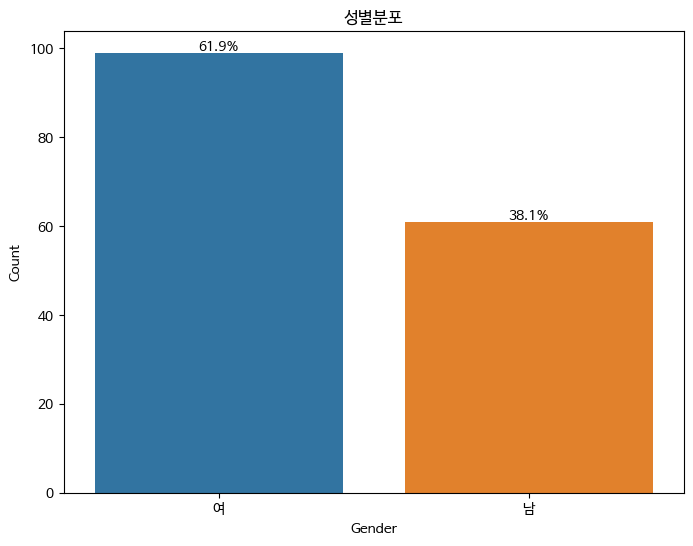

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='귀하의 성별을 선택해주세요.', data=pre_customer_df)

total = len(pre_customer_df['귀하의 성별을 선택해주세요.'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('성별분포')

plt.xlabel('Gender')

plt.ylabel('Count')

plt.show()

In [ ]:
post_customer_df['성별'] = pre_customer_df['귀하의 성별을 선택해주세요.']

In [ ]:
post_customer_df['성별'] = post_customer_df['성별'].replace({'여': 0, '남': 1})
post_customer_df['성별'].unique()

array([0, 1])

## 3-3. 출생년도 -> 나이

In [ ]:
# 나이 산출
post_customer_df['나이'] = 2023 - pre_customer_df['귀하의 출생년도를 작성해주세요.\n예시) 1999'] + 1

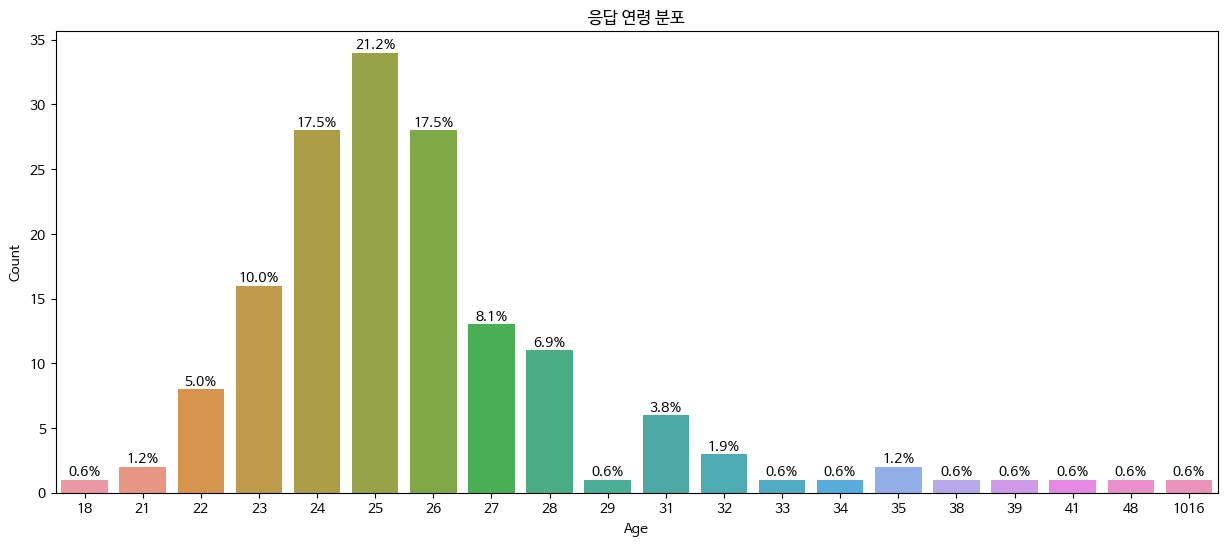

In [ ]:
age_counts = post_customer_df['나이'].value_counts().reset_index()
age_counts.columns = ['나이', 'Count']
age_counts_sorted = age_counts.sort_values('나이')

total_count = age_counts_sorted['Count'].sum()

plt.figure(figsize=(15, 6))
age_barplot = sns.barplot(x='나이', y='Count', data=age_counts_sorted)

#  annotations
for p in age_barplot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    age_barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('응답 연령 분포')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 3-4. 직업군 선택(소득 관련 정보 추론)

In [ ]:
pre_customer_df['직업군_전처리']

0      아르바이트
1         무직
2      아르바이트
3         무직
4        직장인
       ...  
155      직장인
156      직장인
157      직장인
158       무직
159      직장인
Name: 직업군_전처리, Length: 160, dtype: object

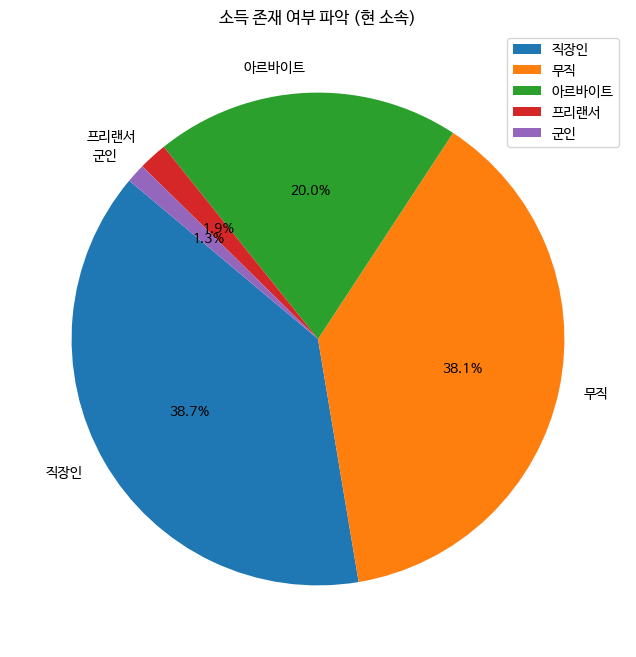

In [ ]:
job_counts = pre_customer_df['직업군_전처리'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('소득 존재 여부 파악 (현 소속)')
plt.legend()
plt.show()

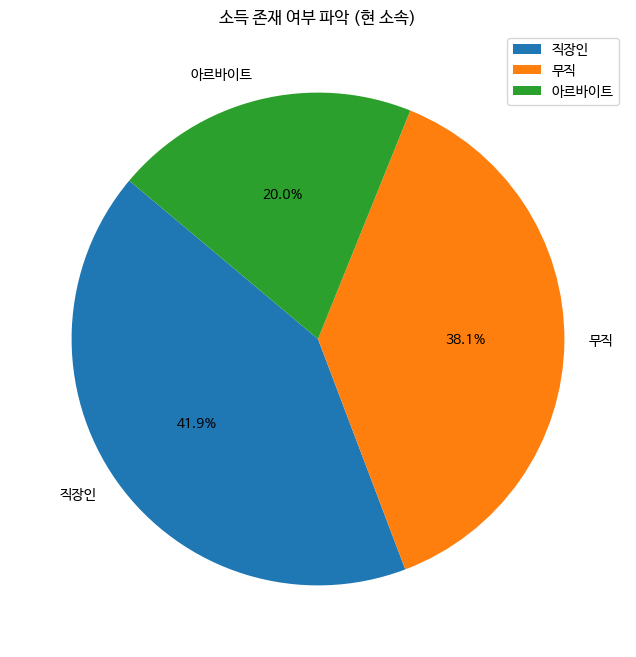

In [ ]:
pre_customer_df['직업군_전처리'] = pre_customer_df['직업군_전처리'].replace({'프리랜서': '직장인', '군인': '직장인'})

job_counts = pre_customer_df['직업군_전처리'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('소득 존재 여부 파악 (현 소속)')
plt.legend()
plt.show()

## 3-5. 관심 분야 선택 (관련 상품 매칭을 위한 고려사항)

In [ ]:
one_hot_encoded = pre_customer_df['아래 조건에 해당하거나 관심 있는 분야를 선택해주세요.(중복가능)'].str.split(', ', expand=True).stack().str.get_dummies().sum(level=0)
one_hot_encoded = one_hot_encoded.add_prefix('관심분야_')

# 순서 변경
cols = [col for col in one_hot_encoded if col != '관심분야_해당사항 없음'] + ['관심분야_해당사항 없음']
one_hot_encoded = one_hot_encoded[cols]
one_hot_encoded.head()

,관심분야_반려인,관심분야_신혼,관심분야_여행,관심분야_직장인,관심분야_청년,관심분야_환경보호(ESG),관심분야_해당사항 없음
0,0,0,1,1,1,1,0
1,0,0,1,0,1,1,0
2,0,0,1,1,0,0,0
3,0,1,0,1,1,0,0
4,0,0,0,0,1,0,0


In [ ]:
post_customer_df = pd.concat([post_customer_df, one_hot_encoded], axis = 1)

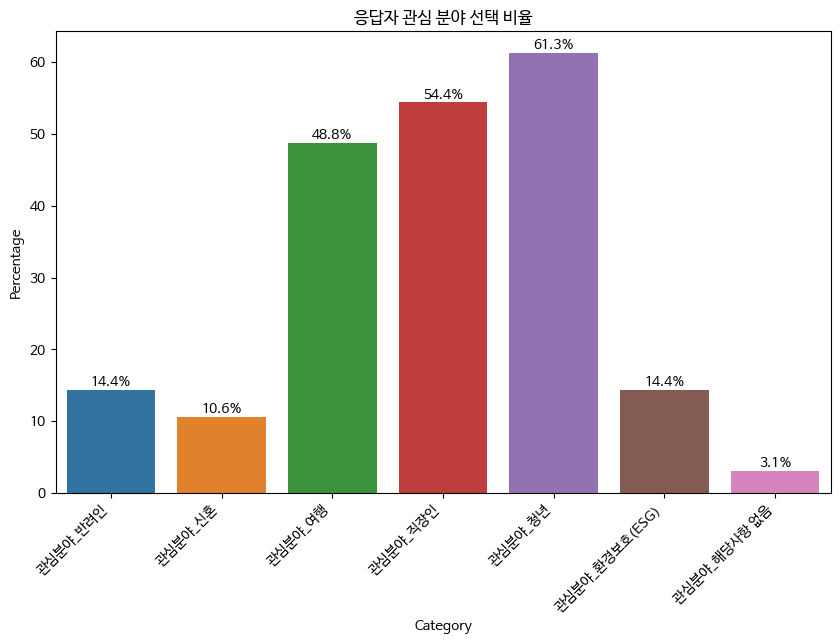

In [ ]:
column_percentages = (one_hot_encoded.sum() / len(one_hot_encoded)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('응답자 관심 분야 선택 비율')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

## 기초 금융 관심도 및 현황 파악

## 3-6. 주거래 은행 파악

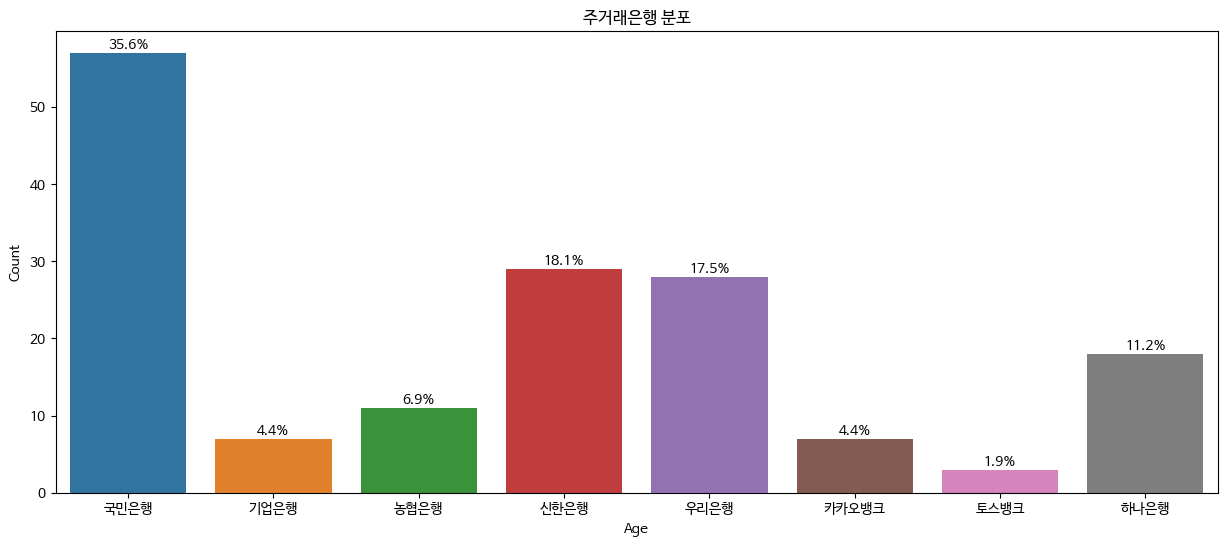

In [ ]:
age_counts = pre_customer_df['주거래은행_전처리'].value_counts().reset_index()
age_counts.columns = ['주거래은행', 'Count']
age_counts_sorted = age_counts.sort_values('주거래은행')

total_count = age_counts_sorted['Count'].sum()

plt.figure(figsize=(15, 6))
age_barplot = sns.barplot(x='주거래은행', y='Count', data=age_counts_sorted)

for p in age_barplot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    age_barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('주거래은행 분포')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 3-8.  금융 상식, 관심도, 지식 수준 정도 (스스로 평가)

In [ ]:
mapping = {
    "［관심없음］ 기준금리 등 금융정보에 대한 관심이 없는 정도" : '관심도_낮음',
    "［보통］ 예금과 적금의 차이를 구별할 수 있는 정도": '관심도_보통',
    "［높음］ 모든 금융 상품의 차이를 고려하여 나에게 알맞은 상품을 선택할 수 있을 정도": '관심도_높음',
    "［매우 높음］경기의 흐름과 금융상품의 관계를 파악하는 정도": '관심도_매우높음'
}

pre_customer_df['금융관심도'] = pre_customer_df['금융에 대한 본인의 지식 수준은 어느 정도라고 생각하시나요?'].replace(mapping)

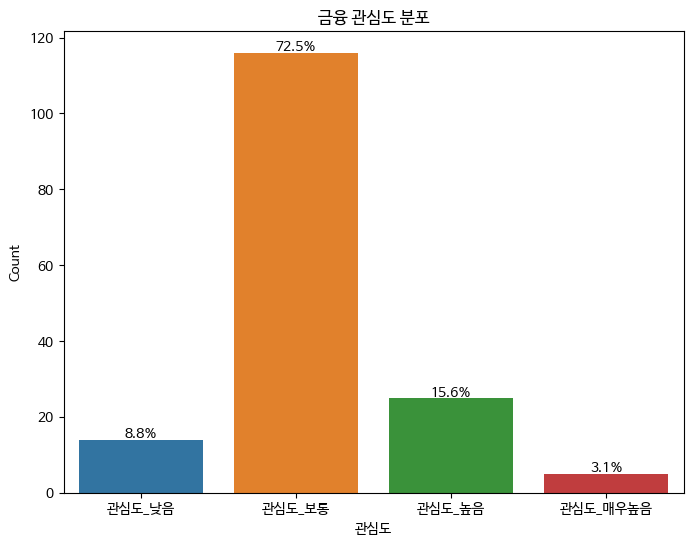

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='금융관심도', data=pre_customer_df,
                   order=['관심도_낮음', '관심도_보통', '관심도_높음', '관심도_매우높음']) # 순서 설정

total = len(pre_customer_df['금융관심도'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('금융 관심도 분포')

plt.xlabel('관심도')

plt.ylabel('Count')

plt.show()

### 3-8-1. 소득 형태에 따른 금융 관심도

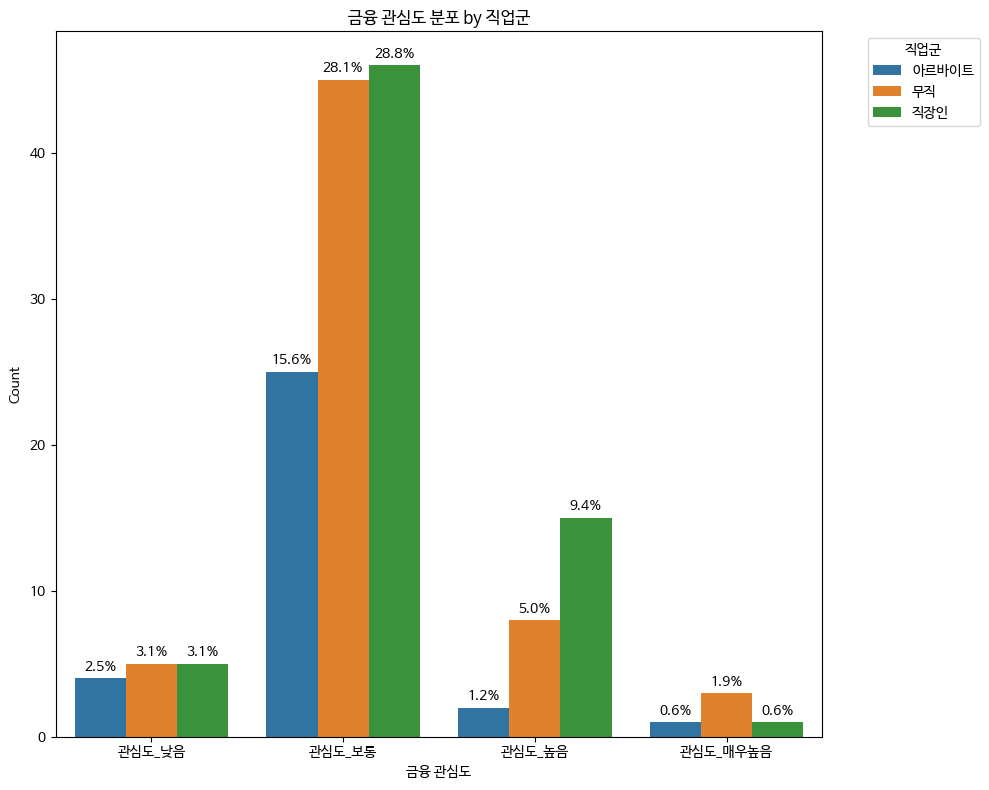

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    x='금융관심도',
    data=pre_customer_df,
    hue='직업군_전처리', # 금융 관심도를 직업군별로 나누어 표시
    order=['관심도_낮음', '관심도_보통', '관심도_높음', '관심도_매우높음']  # 순서 설정
)

for p in ax.patches:
    height = p.get_height()
    if pd.notnull(height):
        percentage = '{:.1f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height + 0.5
        ax.annotate(percentage, (x, y), ha='center')

plt.title('금융 관심도 분포 by 직업군')
plt.xlabel('금융 관심도')
plt.ylabel('Count')
plt.legend(title='직업군', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # 레이아웃 조정
plt.show()

## 3-9. 관심있는 금융 상품 복수선택

In [ ]:
one_hot_encoded_2 = pre_customer_df['관심있는 금융상품을 선택해주세요.(중복가능)'].str.split(', ', expand=True).stack().str.get_dummies().sum(level=0)
one_hot_encoded_2 = one_hot_encoded_2.add_prefix('관심상품_')

one_hot_encoded_2.head()

,관심상품_CMA,관심상품_가상자산(비트코인,관심상품_없음,관심상품_예금,관심상품_이더리움),관심상품_적금,관심상품_주식,관심상품_주택청약,관심상품_파킹통장,관심상품_펀드
0,0,0,0,1,0,1,0,1,1,0
1,0,0,0,1,0,1,1,1,0,0
2,0,1,0,0,1,0,1,1,0,0
3,0,0,0,1,0,0,1,1,0,0
4,0,0,0,1,0,1,0,1,0,0


In [ ]:
one_hot_encoded_2['관심상품_가상자산'] = (one_hot_encoded_2['관심상품_가상자산(비트코인'] | one_hot_encoded_2['관심상품_이더리움)']).astype(int)

# 순서
cols = [col for col in one_hot_encoded_2 if col != '관심상품_없음'] + ['관심상품_없음']
one_hot_encoded_2 = one_hot_encoded_2[cols]

one_hot_encoded_2.drop(['관심상품_가상자산(비트코인', '관심상품_이더리움)'], axis=1, inplace=True)

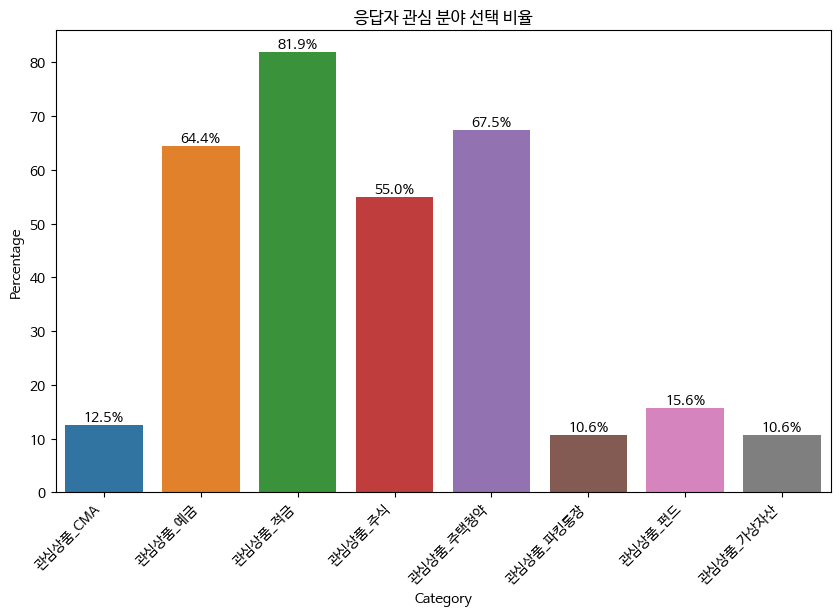

In [ ]:
column_percentages = (one_hot_encoded_2.sum() / len(one_hot_encoded_2)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages.iloc[:-1,:])

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('응답자 관심 분야 선택 비율')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

### 3-9-1. 관심상품 선택 비율 (얼마나 많은 다수의 상품에 관심이 있는지)

In [ ]:
one_hot_encoded_2['관심상품_비율'] = one_hot_encoded_2.iloc[:,:-1].sum(axis=1) / 8
one_hot_encoded_2

,관심상품_CMA,관심상품_예금,관심상품_적금,관심상품_주식,관심상품_주택청약,관심상품_파킹통장,관심상품_펀드,관심상품_가상자산,관심상품_없음,관심상품_비율
0,0,1,1,0,1,1,0,0,0,0.500
1,0,1,1,1,1,0,0,0,0,0.500
2,0,0,0,1,1,0,0,1,0,0.375
3,0,1,0,1,1,0,0,0,0,0.375
4,0,1,1,0,1,0,0,0,0,0.375
...,...,...,...,...,...,...,...,...,...,...
155,0,1,1,0,0,0,0,0,0,0.250
156,0,1,1,1,1,0,0,0,0,0.500
157,0,0,0,1,0,0,0,0,0,0.125
158,0,1,0,0,0,0,0,0,0,0.125


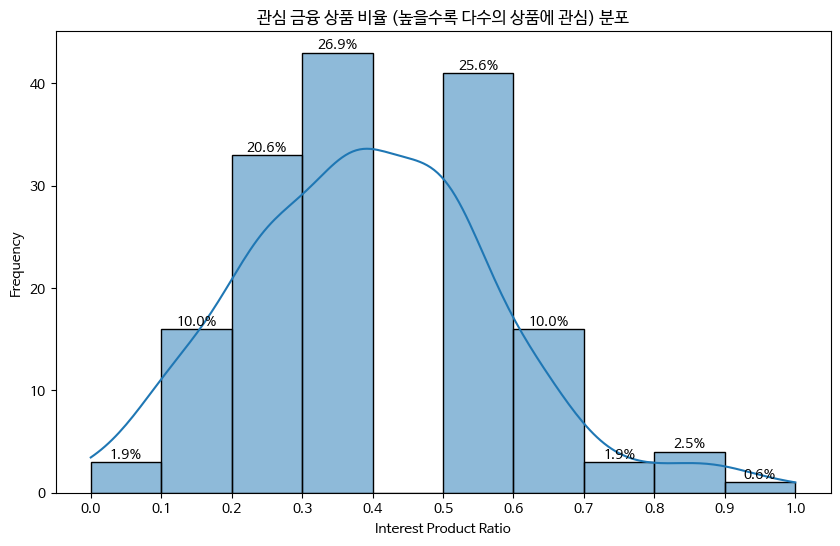

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(one_hot_encoded_2['관심상품_비율'], bins=np.arange(0, 1.1, 0.1), kde=True)

#각 막대(bin)에 대한 비율 계산 및 주석 추가
total = len(one_hot_encoded_2['관심상품_비율'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if p.get_height() > 0:  # 높이가 0보다 클 때만 주석을 추가합니다.
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# 더 세밀한 X 축 눈금 설정
plt.xticks(np.arange(0, 1.1, 0.1))

plt.title('관심 금융 상품 비율 (높을수록 다수의 상품에 관심) 분포')
plt.xlabel('Interest Product Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
post_customer_df = pd.concat([post_customer_df, one_hot_encoded_2], axis = 1)
post_customer_df

,ID,성별,나이,관심분야_반려인,관심분야_신혼,관심분야_여행,관심분야_직장인,관심분야_청년,관심분야_환경보호(ESG),관심분야_해당사항 없음,관심상품_CMA,관심상품_예금,관심상품_적금,관심상품_주식,관심상품_주택청약,관심상품_파킹통장,관심상품_펀드,관심상품_가상자산,관심상품_없음,관심상품_비율
0,0,0,25,0,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0.500
1,1,0,23,0,0,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0.500
2,2,1,27,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0.375
3,3,1,31,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0.375
4,4,0,24,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,0,18,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0.250
156,156,0,28,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0.500
157,157,0,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.125
158,158,1,25,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.125


### 3-9-2. 직장인 관심상품

In [ ]:
tmp_df_1 = pd.concat([pre_customer_df,one_hot_encoded_2], axis = 1)

In [ ]:
tmp_work = tmp_df_1[tmp_df_1['직업군_전처리'] == '직장인'][one_hot_encoded_2.columns].reset_index(drop='index').iloc[:,:-1]

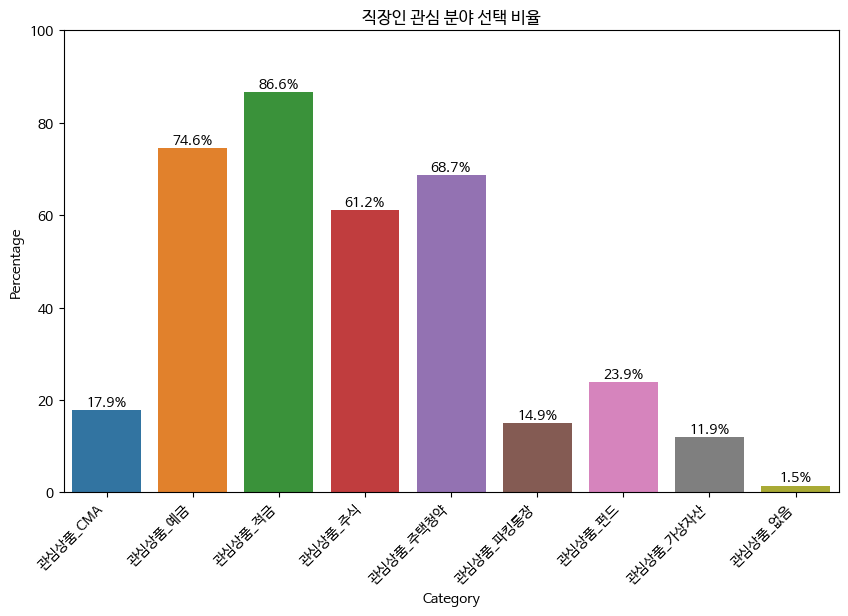

In [ ]:
column_percentages = (tmp_work.sum() / len(tmp_work)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('직장인 관심 분야 선택 비율')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

### 3-9-3. 무직 관심 상품

In [ ]:
tmp_no_work = tmp_df_1[tmp_df_1['직업군_전처리'] == '무직'][one_hot_encoded_2.columns].reset_index(drop='index').iloc[:,:-1]

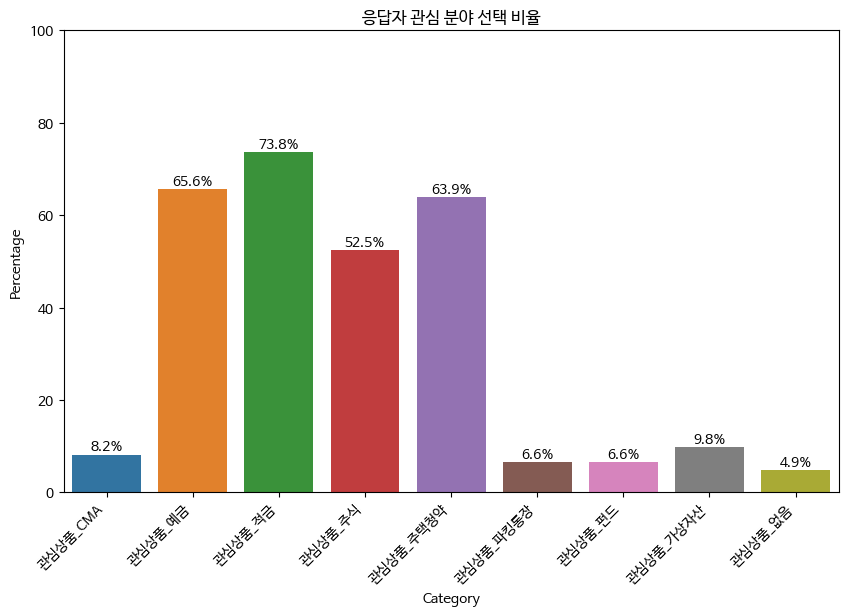

In [ ]:
column_percentages = (tmp_no_work.sum() / len(tmp_no_work)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('응답자 관심 분야 선택 비율')
plt.xlabel('Category')
plt.ylabel('Percentage')

plt.ylim(0,100)
plt.show()

### 3-9-4. 아르바이트 관심 상품

In [ ]:
tmp_half_work = tmp_df_1[tmp_df_1['직업군_전처리'] == '아르바이트'][one_hot_encoded_2.columns].reset_index(drop='index').iloc[:,:-1]

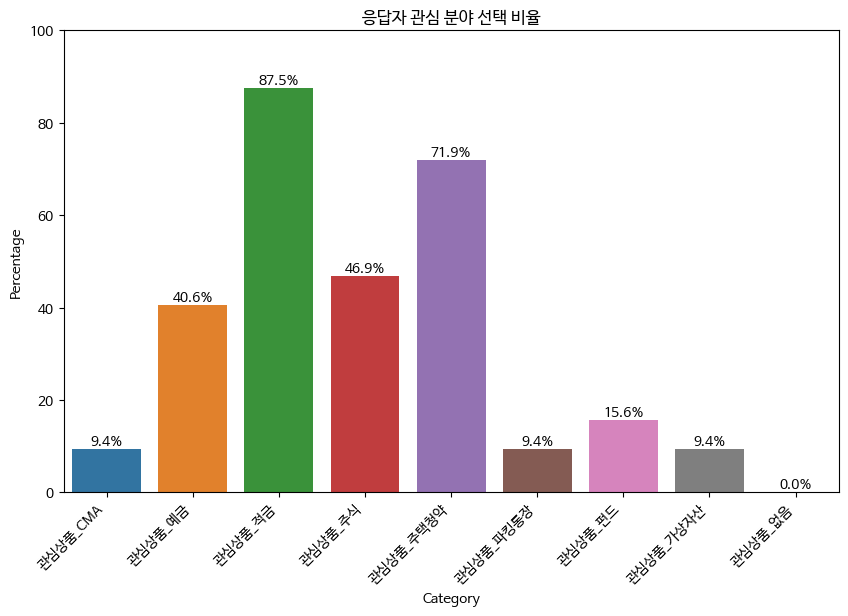

In [ ]:
column_percentages = (tmp_half_work.sum() / len(tmp_half_work)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('응답자 관심 분야 선택 비율')
plt.xlabel('Category')
plt.ylabel('Percentage')

plt.ylim(0,100)
plt.show()

### 3-9-5. 아르바이트 + 무직

In [ ]:
tmp_tmp_work = tmp_df_1[tmp_df_1['직업군_전처리'].isin(['아르바이트', '무직'])][one_hot_encoded_2.columns].reset_index(drop=True).iloc[:,:-1]

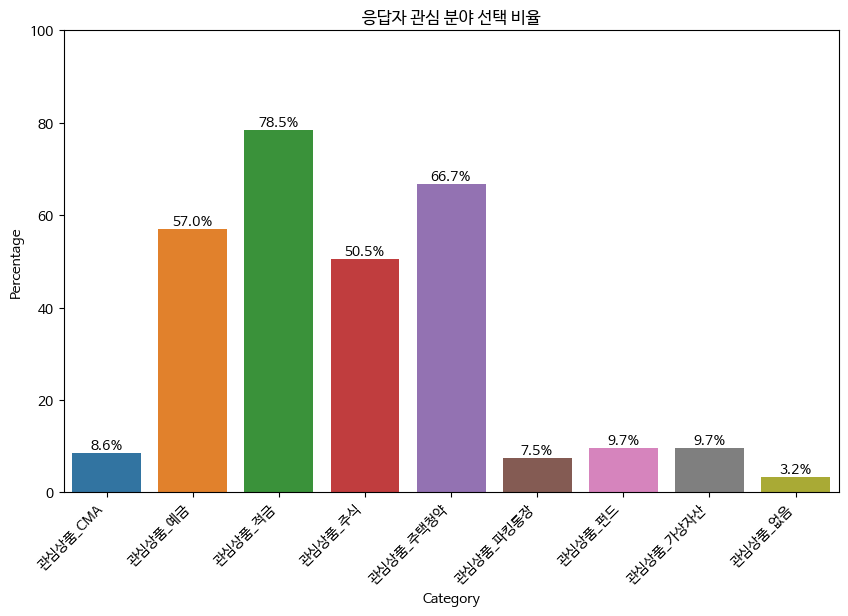

In [ ]:
column_percentages = (tmp_tmp_work.sum() / len(tmp_tmp_work)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('응답자 관심 분야 선택 비율')
plt.xlabel('Category')
plt.ylabel('Percentage')

plt.ylim(0,100)
plt.show()

## 청년상품 관련 문항

- 조건에 부합한다면, 청년 상품의 이율이 유리하다. 해당 측면 고려를 위한 조사.

## 3-10. 청년금융상품(청년희망적금, 청년도약계좌, 청년내일저축계좌 등)가입 여부 파악

In [ ]:
pre_customer_df['귀하는 현재 청년금융상품(청년희망적금, 청년도약계좌, 청년내일저축계좌 등)에 가입 중이십니까?']
post_customer_df['청년금융상품_보유여부'] = pre_customer_df['귀하는 현재 청년금융상품(청년희망적금, 청년도약계좌, 청년내일저축계좌 등)에 가입 중이십니까?']
post_customer_df['청년금융상품_보유여부'] = post_customer_df['청년금융상품_보유여부'].replace({'아니오': 0, '예': 1})
post_customer_df['청년금융상품_보유여부'].unique()

array([1, 0])

In [ ]:
post_customer_df.head()

,ID,성별,나이,관심분야_반려인,관심분야_신혼,관심분야_여행,관심분야_직장인,관심분야_청년,관심분야_환경보호(ESG),관심분야_해당사항 없음,...,관심상품_예금,관심상품_적금,관심상품_주식,관심상품_주택청약,관심상품_파킹통장,관심상품_펀드,관심상품_가상자산,관심상품_없음,관심상품_비율,청년금융상품_보유여부
0,0,0,25,0,0,1,1,1,1,0,...,1,1,0,1,1,0,0,0,0.500,1
1,1,0,23,0,0,1,0,1,1,0,...,1,1,1,1,0,0,0,0,0.500,1
2,2,1,27,0,0,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0.375,0
3,3,1,31,0,1,0,1,1,0,0,...,1,0,1,1,0,0,0,0,0.375,0
4,4,0,24,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0.375,1


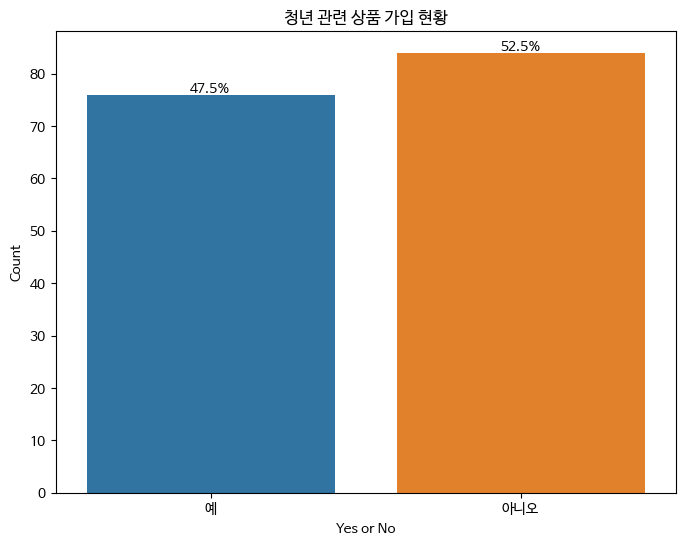

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='귀하는 현재 청년금융상품(청년희망적금, 청년도약계좌, 청년내일저축계좌 등)에 가입 중이십니까?', data=pre_customer_df)

total = len(pre_customer_df['귀하는 현재 청년금융상품(청년희망적금, 청년도약계좌, 청년내일저축계좌 등)에 가입 중이십니까?'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('청년 관련 상품 가입 현황')

plt.xlabel('Yes or No')

plt.ylabel('Count')

plt.show()

### [+] 연령별 청년상품 보유 여부

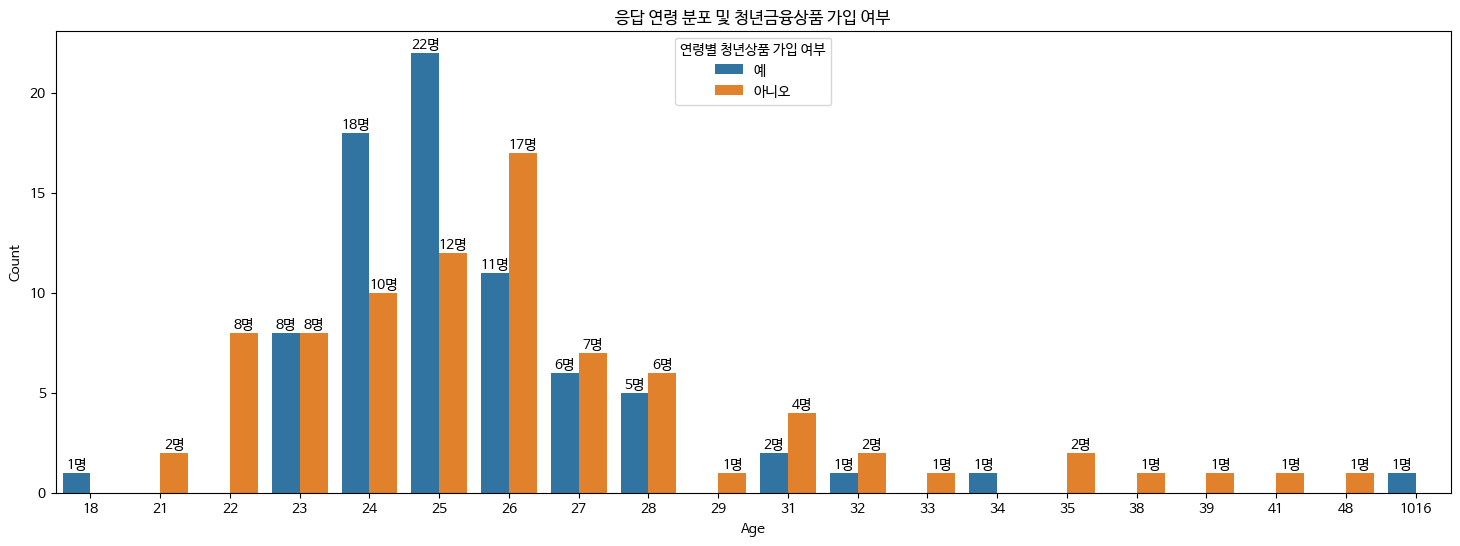

In [ ]:
pre_customer_df['나이'] = 2023 - pre_customer_df['귀하의 출생년도를 작성해주세요.\n예시) 1999'] + 1

age_product_counts = pre_customer_df.groupby(['나이', '귀하는 현재 청년금융상품(청년희망적금, 청년도약계좌, 청년내일저축계좌 등)에 가입 중이십니까?']).size().reset_index(name='Count')

plt.figure(figsize=(18, 6))
age_barplot = sns.barplot(x='나이', y='Count', hue='귀하는 현재 청년금융상품(청년희망적금, 청년도약계좌, 청년내일저축계좌 등)에 가입 중이십니까?', data=age_product_counts)

for p in age_barplot.patches:
    height = p.get_height()
    if pd.notnull(height):
        x = p.get_x() + p.get_width() / 2
        y = height
        age_barplot.annotate(f'{int(height)}명', (x, y), ha='center', va='bottom')

plt.title('응답 연령 분포 및 청년금융상품 가입 여부')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='연령별 청년상품 가입 여부')
plt.show()

### 3-10-1. 해당상품(청년상품) 상품이 주거래 은행인지 여부

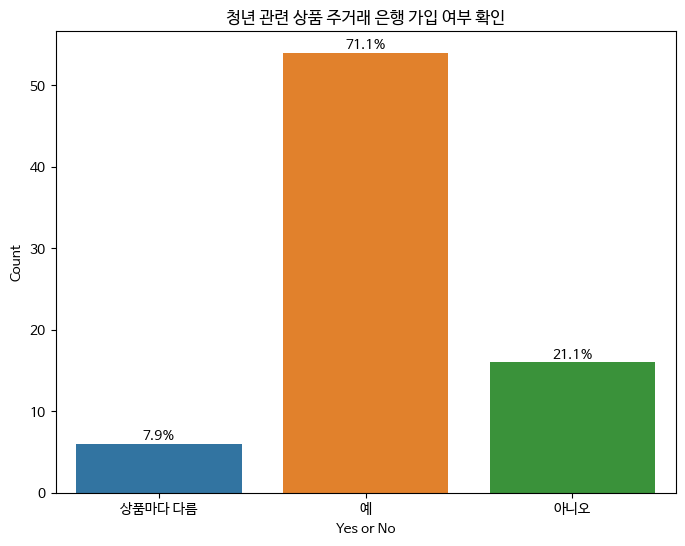

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='해당 상품이 주거래 은행 상품인가요?', data=pre_customer_df)

total = len(pre_customer_df['해당 상품이 주거래 은행 상품인가요?']) - pre_customer_df['해당 상품이 주거래 은행 상품인가요?'].isnull().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('청년 관련 상품 주거래 은행 가입 여부 확인')

plt.xlabel('Yes or No')

plt.ylabel('Count')

plt.show()

### 3-10-2. 상품 가입 경로를 선택(중복가능)

In [ ]:
one_hot_encoded_3 = pre_customer_df['상품 가입 경로를 선택해주세요.(중복가능)'].str.split(', ', expand=True).stack().str.get_dummies().sum(level=0)
one_hot_encoded_3 = one_hot_encoded_3.add_prefix('가입경로_')

one_hot_encoded_3.head()

,가입경로_SNS,가입경로_영업점 방문,가입경로_은행 방문,가입경로_은행 앱,가입경로_지인추천,가입경로_포털검색
0,0,0,0,1,0,1
1,1,0,0,1,0,0
4,0,0,0,1,0,0
5,0,0,0,0,1,0
6,0,0,0,1,1,0


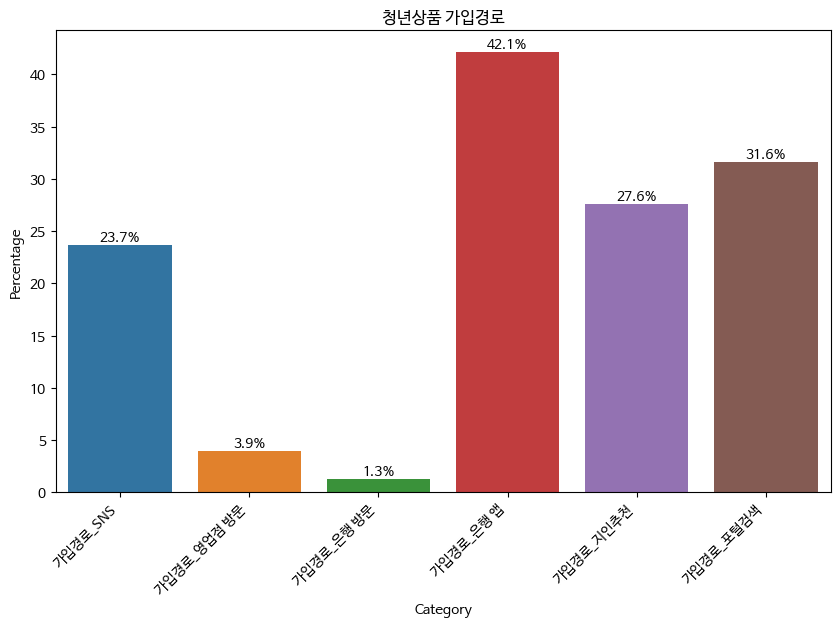

In [ ]:
column_percentages = (one_hot_encoded_3.sum() / len(one_hot_encoded_3)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('청년상품 가입경로')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

### 3-10-3.청년 상품 미가입 사유 파악

In [ ]:
one_hot_encoded_4 = pre_customer_df['가입하지 않은 이유를 선택해주세요.'].str.split(', ', expand=True).stack().str.get_dummies().sum(level=0)
one_hot_encoded_4 = one_hot_encoded_4.add_prefix('미가입사유_')

one_hot_encoded_4.head()

,미가입사유_가입조건 미충족,미가입사유_복잡한 절차,미가입사유_유지기간 부담,미가입사유_정보 부족,미가입사유_필요성 못 느낌
2,0,0,0,0,1
3,0,0,0,0,1
13,0,0,0,1,0
14,1,0,1,0,0
16,1,0,0,0,0


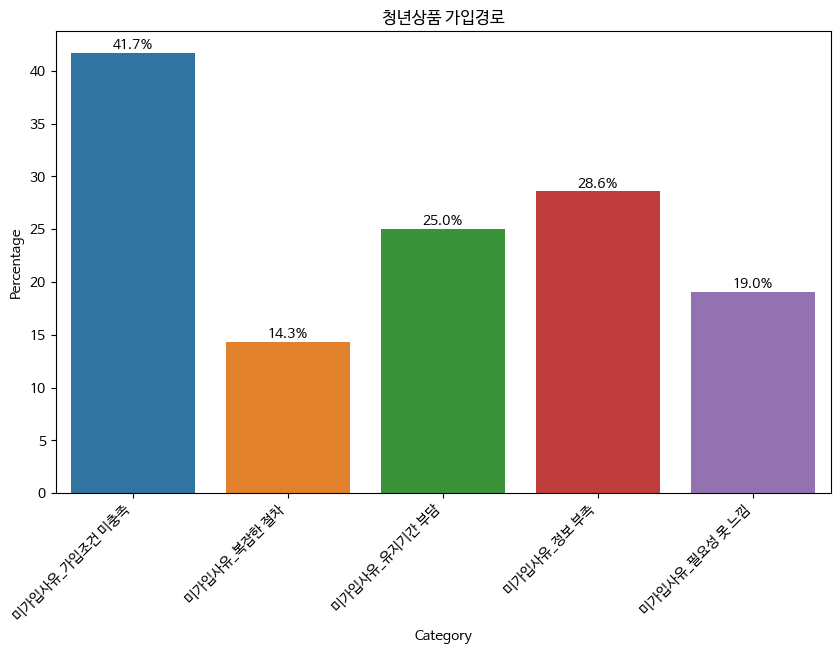

In [ ]:
column_percentages = (one_hot_encoded_4.sum() / len(one_hot_encoded_4)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('청년상품 가입경로')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

## 실제 보유중인 금융상품 관련 조사

## 3-11. 실제 보유중인 금융상품 조사

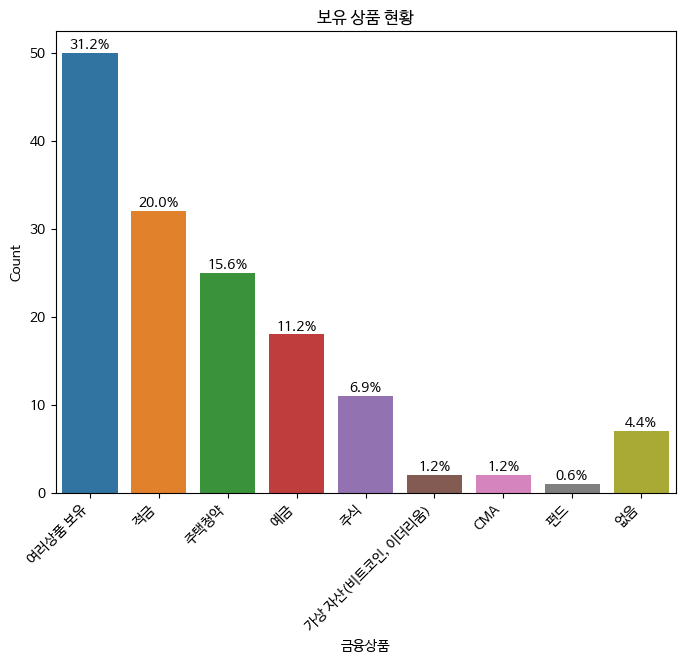

In [ ]:
plt.figure(figsize=(8, 6))


ax = sns.countplot(x='현재 아래 금융 상품 중 보유하고 계신 상품이 있으신가요?', data=pre_customer_df.iloc[12:,:],
                   order=['여러상품 보유', '적금', '주택청약', '예금', '주식', '가상 자산(비트코인, 이더리움)','CMA','펀드','없음'])

total = len(pre_customer_df['현재 아래 금융 상품 중 보유하고 계신 상품이 있으신가요?'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('보유 상품 현황')

plt.xlabel('금융상품')

plt.xticks(rotation=45, ha='right')

plt.ylabel('Count')

plt.show()

### [+] 직업군별 보유 상품 비율 확인

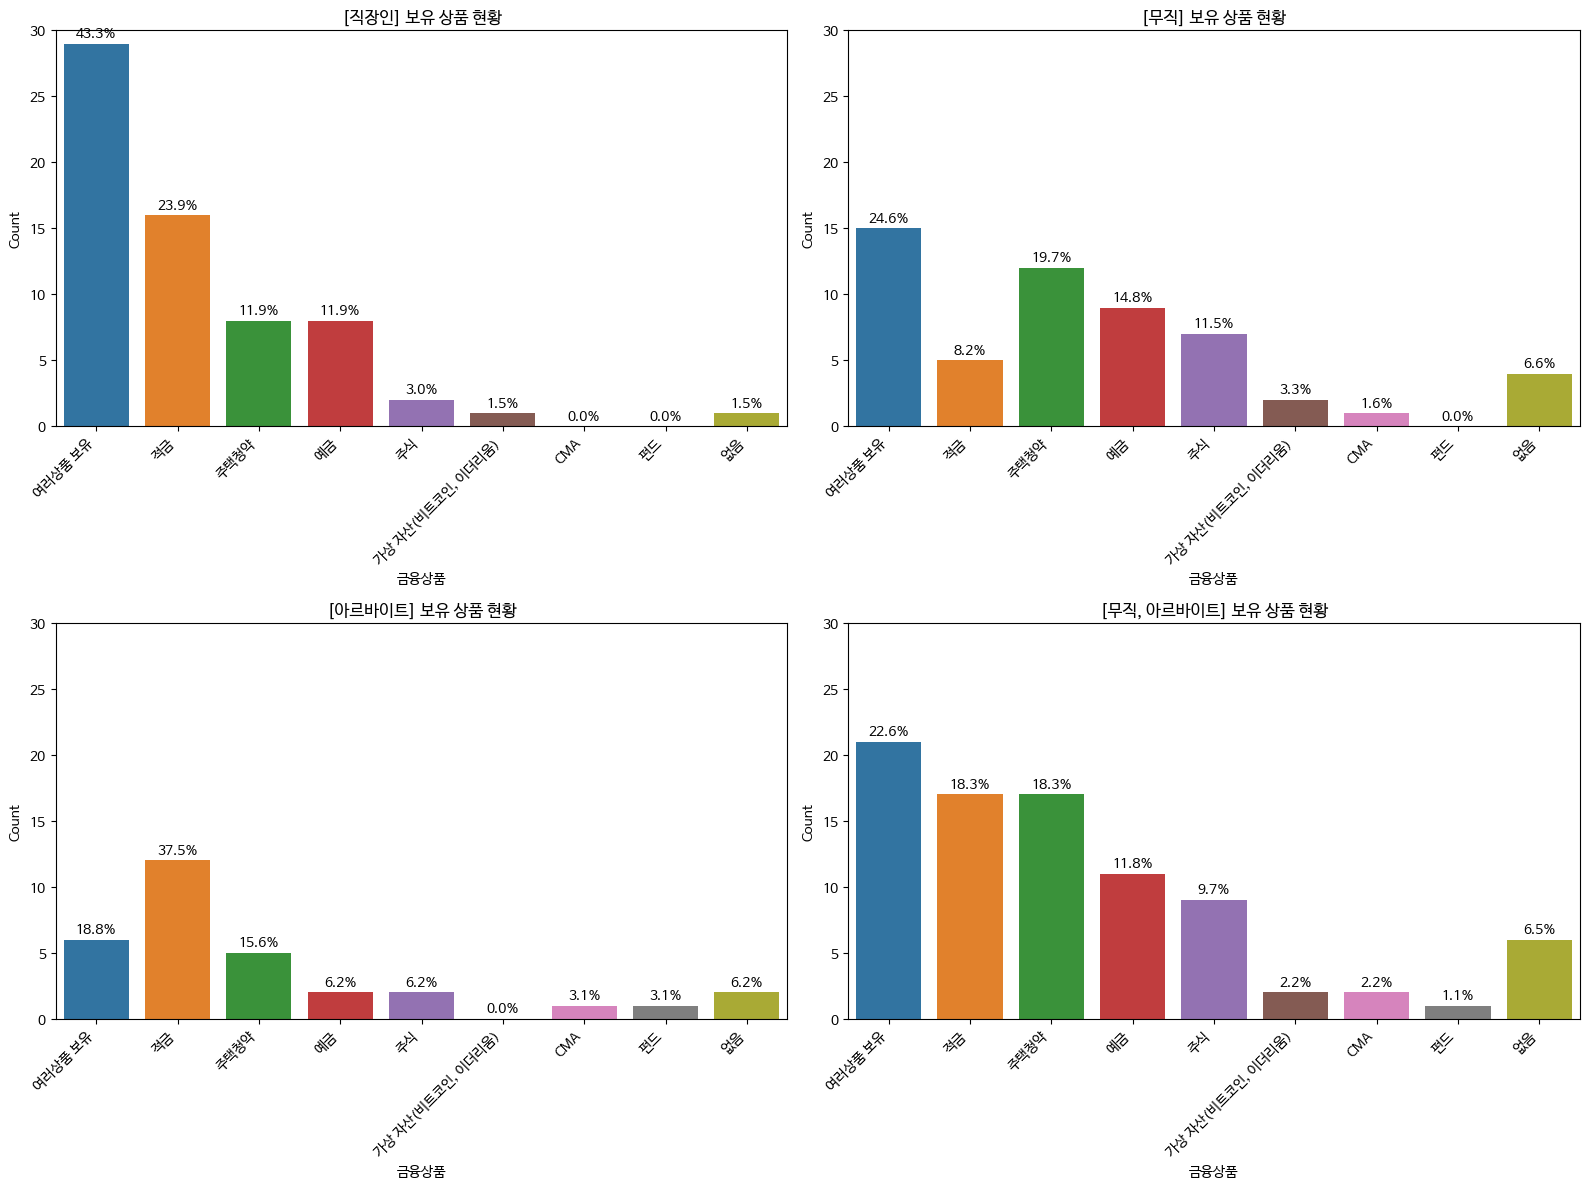

In [ ]:
filtered_dfs = {
    '직장인': pre_customer_df[pre_customer_df['직업군_전처리'] == '직장인'],
    '무직': pre_customer_df[pre_customer_df['직업군_전처리'] == '무직'],
    '아르바이트': pre_customer_df[pre_customer_df['직업군_전처리'] == '아르바이트'],
    '무직, 아르바이트': pre_customer_df[pre_customer_df['직업군_전처리'].isin(['아르바이트', '무직'])]
}

# 시각화
plt.figure(figsize=(16, 12))

for i, (title, df) in enumerate(filtered_dfs.items(), 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(
        x='현재 아래 금융 상품 중 보유하고 계신 상품이 있으신가요?',
        data=df,
        order=['여러상품 보유', '적금', '주택청약', '예금', '주식', '가상 자산(비트코인, 이더리움)', 'CMA', '펀드', '없음']
    )

    total = len(df['현재 아래 금융 상품 중 보유하고 계신 상품이 있으신가요?'])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) if total > 0 else '0%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 0.5
        ax.annotate(percentage, (x, y), ha='center')

    plt.title(f'[{title}] 보유 상품 현황')
    plt.xlabel('금융상품')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.ylim(0, 30)

plt.tight_layout()
plt.show()

### 3-11-1. 해당 금융 상품들을 직접 가입 했는지 여부

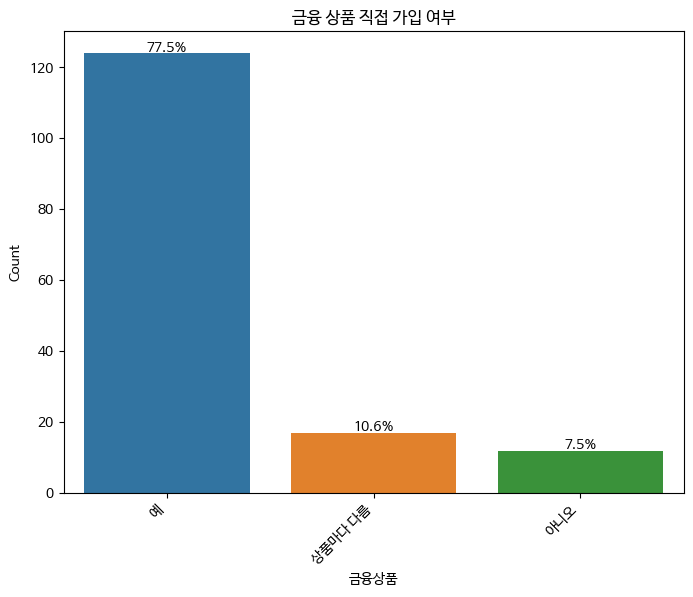

In [ ]:
plt.figure(figsize=(8, 6))


ax = sns.countplot(x='본인이 직접 가입하셨나요?', data=pre_customer_df)

total = len(pre_customer_df['본인이 직접 가입하셨나요?'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('금융 상품 직접 가입 여부')

plt.xlabel('금융상품')

plt.xticks(rotation=45, ha='right')

plt.ylabel('Count')

plt.show()

### 3-11-2. 해당 상품들이 주거래 은행인지 여부

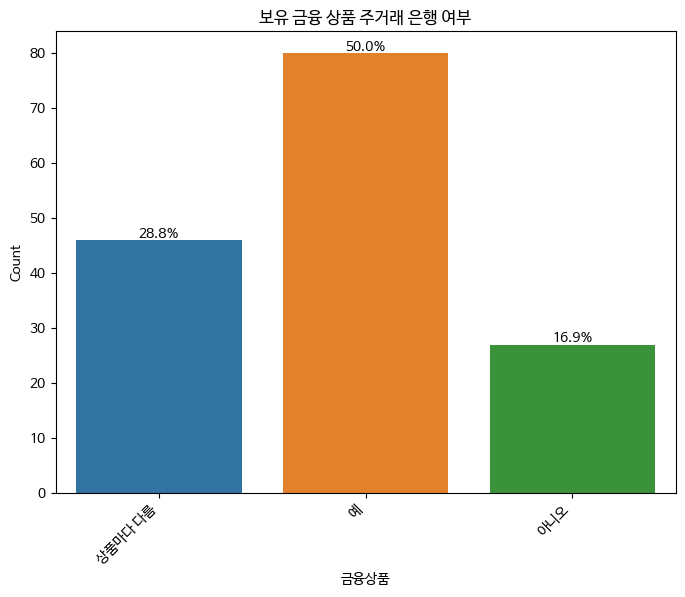

In [ ]:
plt.figure(figsize=(8, 6))


ax = sns.countplot(x='해당 상품들이 주거래 은행 상품인가요?', data=pre_customer_df)

total = len(pre_customer_df['해당 상품들이 주거래 은행 상품인가요?'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('보유 금융 상품 주거래 은행 여부')

plt.xlabel('금융상품')

plt.xticks(rotation=45, ha='right')

plt.ylabel('Count')

plt.show()

### 3-11-3. 상품 가입 경로를 선택 (중복가능)

In [ ]:
join_method_mapping = {
    '주택청약 같은 경우는 학교에서 진행했던 홍보행사를 통해 가입함.': '기타',
    '부모님 권유': '기타',
    '직접 방문': '영업점 방문',
    '필요해서': '기타',
    '은행 방문': '영업점 방문',
    '은행 방문 당시 영업으로 인해 가입': '영업점 방문',
}

pre_customer_df['상품 가입 경로를 선택해주세요.(중복가능).1'] = pre_customer_df['상품 가입 경로를 선택해주세요.(중복가능).1'].map(lambda x: join_method_mapping.get(x, x))

# 결과 출력
pre_customer_df['상품 가입 경로를 선택해주세요.(중복가능).1'].value_counts()

은행 앱                                         50
지인추천                                         34
포털검색                                         20
포털검색, 은행 앱                                   12
은행 앱, 지인추천                                    6
포털검색, SNS                                     4
SNS, 지인추천                                     4
영업점 방문                                        3
SNS, 은행 앱                                     3
은행 앱, 영업점 방문                                  3
포털검색, SNS, 은행 앱                               2
SNS                                           2
포털검색, 지인추천                                    2
지인추천, 주택청약 같은 경우는 학교에서 진행했던 홍보행사를 통해 가입함.     1
지인추천, 영업점 방문                                  1
포털검색, 은행 앱, 지인추천                              1
지인추천, 은행 방문                                   1
기타                                            1
포털검색, SNS, 은행 앱, 지인추천, 부모님 권유                 1
포털검색, 은행 앱, 직접 방문                             1
포털검색, 영업점 방문                            

In [ ]:
one_hot_encoded_5 = pre_customer_df['상품 가입 경로를 선택해주세요.(중복가능).1'].str.split(', ', expand=True).stack().str.get_dummies().sum(level=0)
one_hot_encoded_5 = one_hot_encoded_5.add_prefix('상품가입경로_')
# 전처리
one_hot_encoded_5['상품가입경로_기타'] = one_hot_encoded_5['상품가입경로_기타'] + one_hot_encoded_5['상품가입경로_부모님 권유'] +  one_hot_encoded_5['상품가입경로_주택청약 같은 경우는 학교에서 진행했던 홍보행사를 통해 가입함.']
one_hot_encoded_5['영업점 방문'] = one_hot_encoded_5['상품가입경로_영업점 방문'] +  one_hot_encoded_5['상품가입경로_은행 방문'] + one_hot_encoded_5['상품가입경로_직접 방문']

one_hot_encoded_5.drop(['상품가입경로_부모님 권유', '상품가입경로_주택청약 같은 경우는 학교에서 진행했던 홍보행사를 통해 가입함.', '상품가입경로_은행 방문', '상품가입경로_직접 방문'], axis = 1, inplace = True)

one_hot_encoded_5.head()

,상품가입경로_SNS,상품가입경로_기타,상품가입경로_영업점 방문,상품가입경로_은행 앱,상품가입경로_지인추천,상품가입경로_포털검색,영업점 방문
0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0


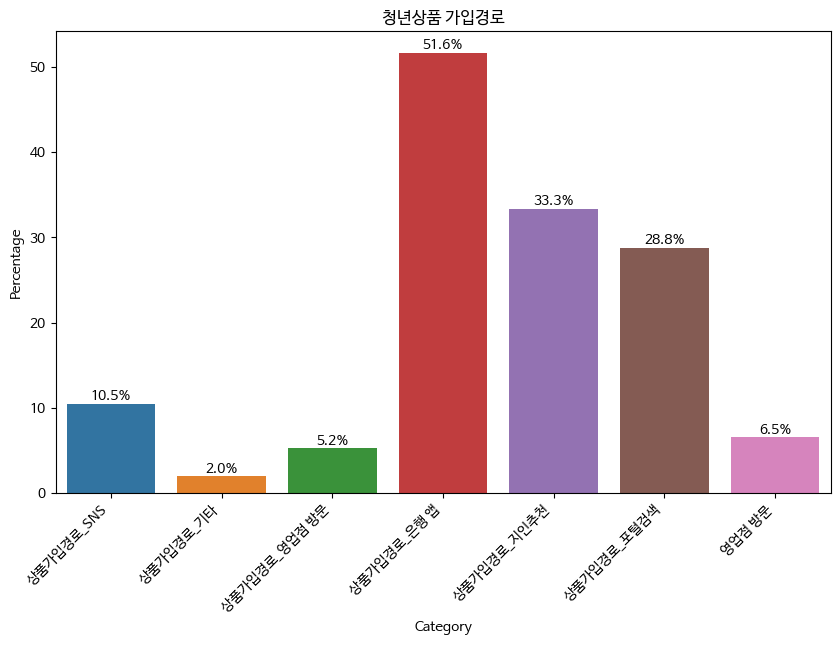

In [ ]:
column_percentages = (one_hot_encoded_5.sum() / len(one_hot_encoded_5)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('청년상품 가입경로')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

## 보험 관련 인식도, 현황 조사

## 3-12. 보험가입이 필수라고 생각하십니까?

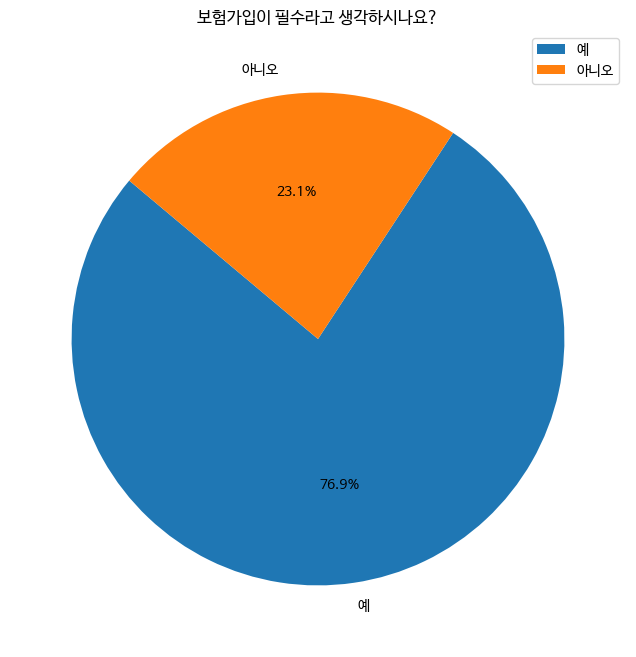

In [ ]:
insurance = pre_customer_df['보험가입이 필수라고 생각하시나요?'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(insurance, labels=insurance.index, autopct='%1.1f%%', startangle=140)
plt.title('보험가입이 필수라고 생각하시나요?')
plt.legend()
plt.show()

### 3-12-1. 현재 가입된 보험을 선택

In [ ]:
one_hot_encoded_6 = pre_customer_df['현재 가입된 보험을 선택해주세요.(중복가능)'].str.split(', ', expand=True).stack().str.get_dummies().sum(level=0)
one_hot_encoded_6 = one_hot_encoded_6.add_prefix('가입보험_')

one_hot_encoded_6.head()

,가입보험_4대보험,가입보험_상해보험,가입보험_실비,가입보험_실비보험,가입보험_없음,가입보험_운전자보험,가입보험_잘 모르겠음,가입보험_저축성보험,가입보험_질병보험
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,1


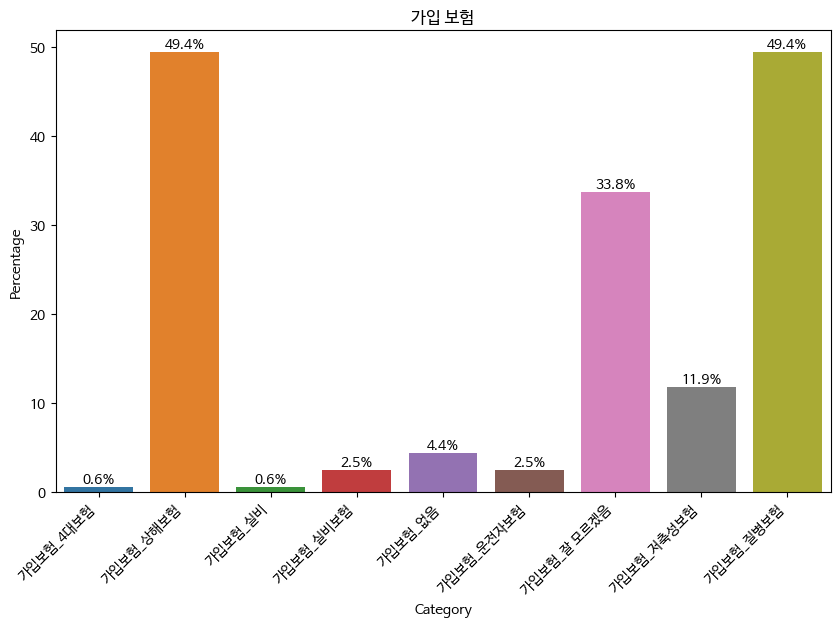

In [ ]:
column_percentages = (one_hot_encoded_6.sum() / len(one_hot_encoded_6)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('가입 보험')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

### 3-12-2. 본인이 직접 가입여부 파악

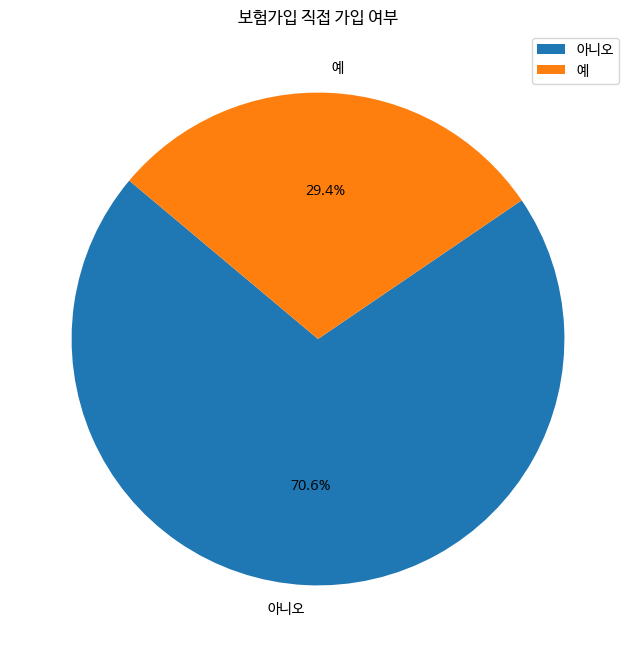

In [ ]:
insurance = pre_customer_df['본인이 직접 가입하셨나요?.1'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(insurance, labels=insurance.index, autopct='%1.1f%%', startangle=140)
plt.title('보험가입 직접 가입 여부')
plt.legend()
plt.show()

## 저축 관련 구체적인 문항, 선호 및 취향 파악

## 3-13. 미래를 위해 저축이 필요하다고 생각하시나요?

1.   항목 추가
2.   항목 추가




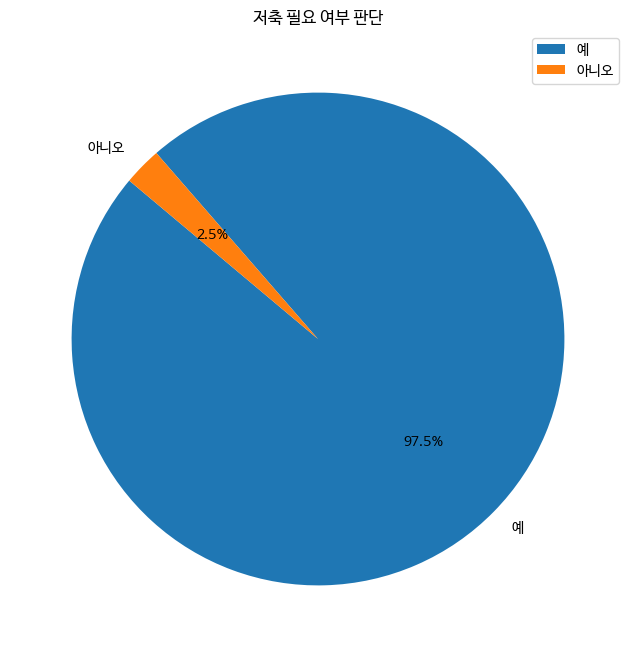

In [ ]:
insurance = pre_customer_df['미래를 위해 저축이 필요하다고 생각하시나요?'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(insurance, labels=insurance.index, autopct='%1.1f%%', startangle=140)
plt.title('저축 필요 여부 판단')
plt.legend()
plt.show()

### 3-13-1. 저축이 필요하다고 생각하는 이유를 선택 (중복가능)




In [ ]:
one_hot_encoded_10 = pre_customer_df['저축이 필요하다고 생각하는 이유를 선택해주세요.(중복가능)'].str.split(', ', expand=True).stack().str.get_dummies().sum(level=0)
one_hot_encoded_10 = one_hot_encoded_10.add_prefix('저축고려사유_')

one_hot_encoded_10.head()

,저축고려사유_기타 (ex. 사업자금/해당없음),"저축고려사유_단기적 자금마련 (ex. 취미활동,여행,자기계발 등)",저축고려사유_장기적 목돈 마련 (ex. 노후 대비),저축고려사유_중장기적 목돈 마련 (ex. 주택구매/결혼자금 등),저축고려사유_투자목적의 자금마련 (ex. 부동산 등)
0,0,1,1,1,1
1,0,0,1,1,0
2,0,0,0,1,1
3,0,0,0,1,1
4,0,0,0,1,0


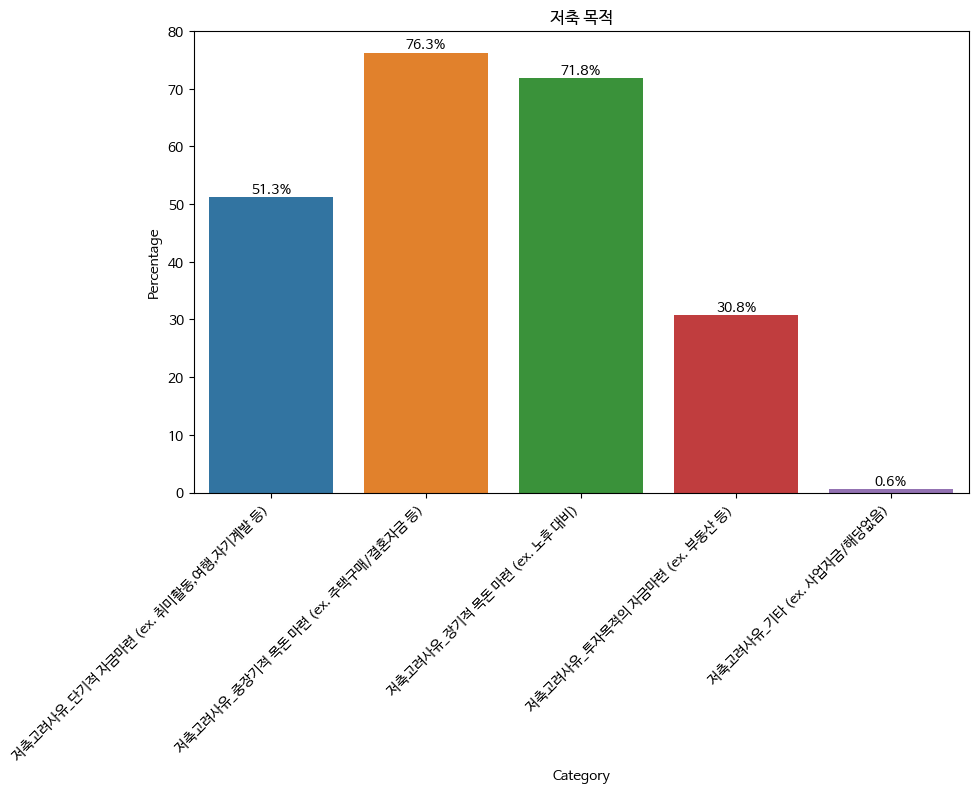

In [ ]:
column_percentages = (one_hot_encoded_10.sum() / len(one_hot_encoded_10)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages,
                      order = ['저축고려사유_단기적 자금마련 (ex. 취미활동,여행,자기계발 등)', '저축고려사유_중장기적 목돈 마련 (ex. 주택구매/결혼자금 등)',
                               '저축고려사유_장기적 목돈 마련 (ex. 노후 대비)', '저축고려사유_투자목적의 자금마련 (ex. 부동산 등)',
                               '저축고려사유_기타 (ex. 사업자금/해당없음)'])

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('저축 목적')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

### [+] 직업군에 따른 저축 고려 사유

#### [직장인] 저축 고려 사유

In [ ]:
tmp_df_2 = pd.concat([pre_customer_df,one_hot_encoded_10], axis = 1)

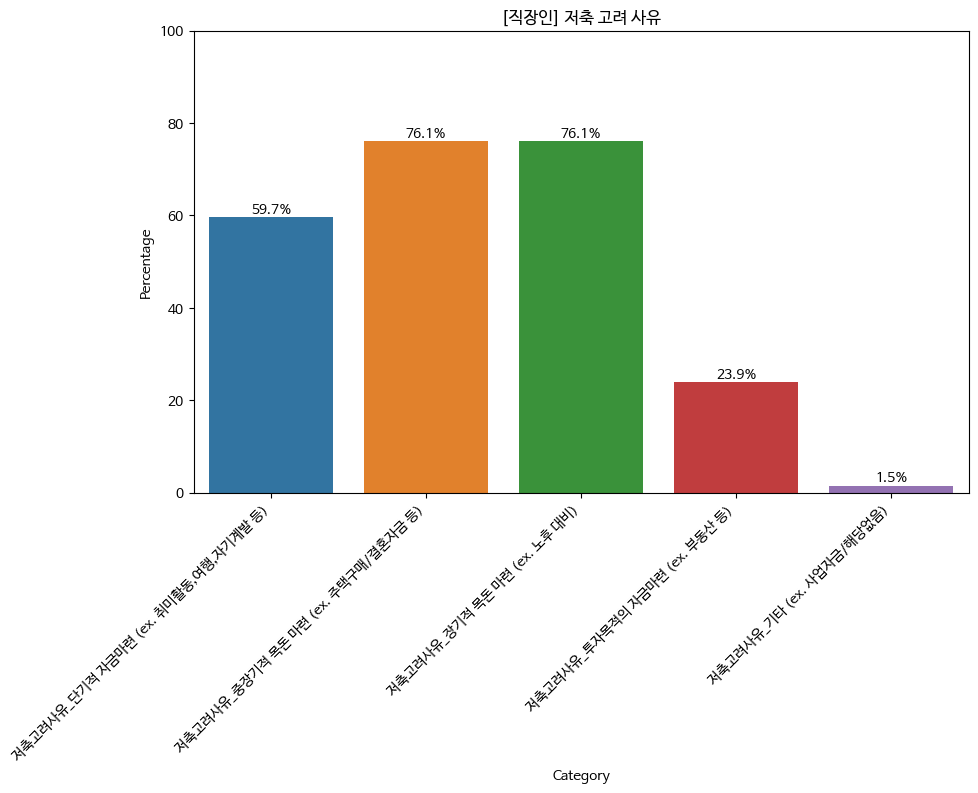

In [ ]:
tmp_work = tmp_df_2[tmp_df_2['직업군_전처리'] == '직장인'][one_hot_encoded_10.columns].reset_index(drop='index')

column_percentages = (tmp_work.sum() / len(tmp_work)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages,
                      order = ['저축고려사유_단기적 자금마련 (ex. 취미활동,여행,자기계발 등)', '저축고려사유_중장기적 목돈 마련 (ex. 주택구매/결혼자금 등)',
                               '저축고려사유_장기적 목돈 마련 (ex. 노후 대비)', '저축고려사유_투자목적의 자금마련 (ex. 부동산 등)',
                               '저축고려사유_기타 (ex. 사업자금/해당없음)'])

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('[직장인] 저축 고려 사유')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

#### [무직] 저축 고려 사유

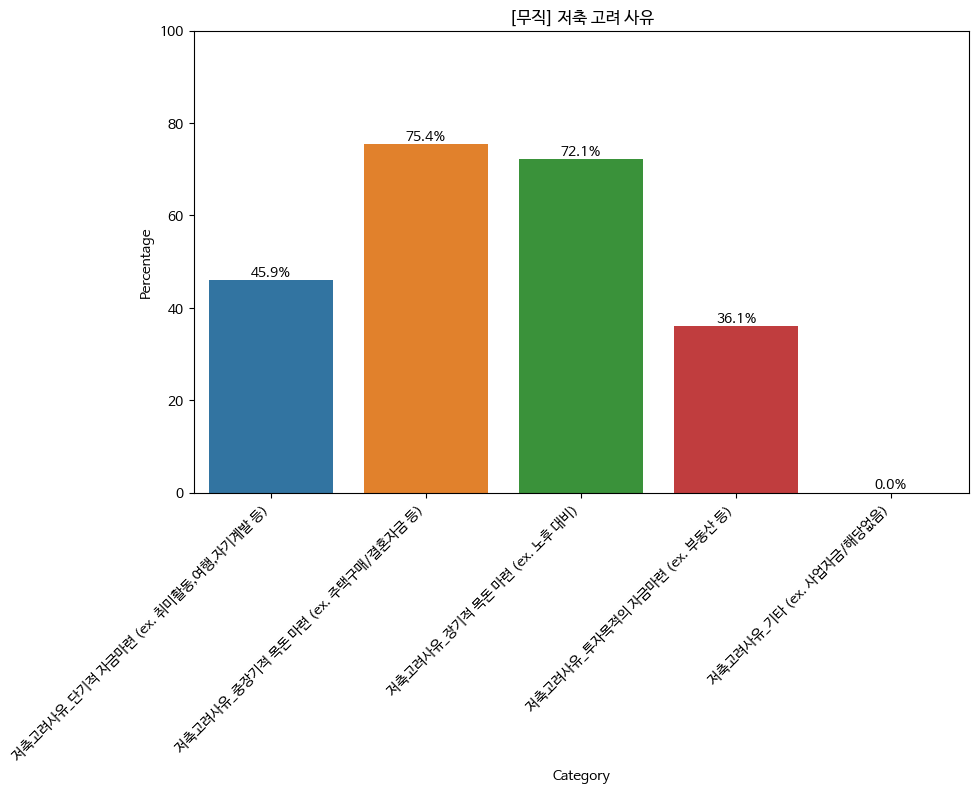

In [ ]:
tmp_no_work = tmp_df_2[tmp_df_2['직업군_전처리'] == '무직'][one_hot_encoded_10.columns].reset_index(drop='index')

column_percentages = (tmp_no_work.sum() / len(tmp_no_work)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages,
                      order = ['저축고려사유_단기적 자금마련 (ex. 취미활동,여행,자기계발 등)', '저축고려사유_중장기적 목돈 마련 (ex. 주택구매/결혼자금 등)',
                               '저축고려사유_장기적 목돈 마련 (ex. 노후 대비)', '저축고려사유_투자목적의 자금마련 (ex. 부동산 등)',
                               '저축고려사유_기타 (ex. 사업자금/해당없음)'])

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('[무직] 저축 고려 사유')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

#### [아르바이트] 저축 고려 사유

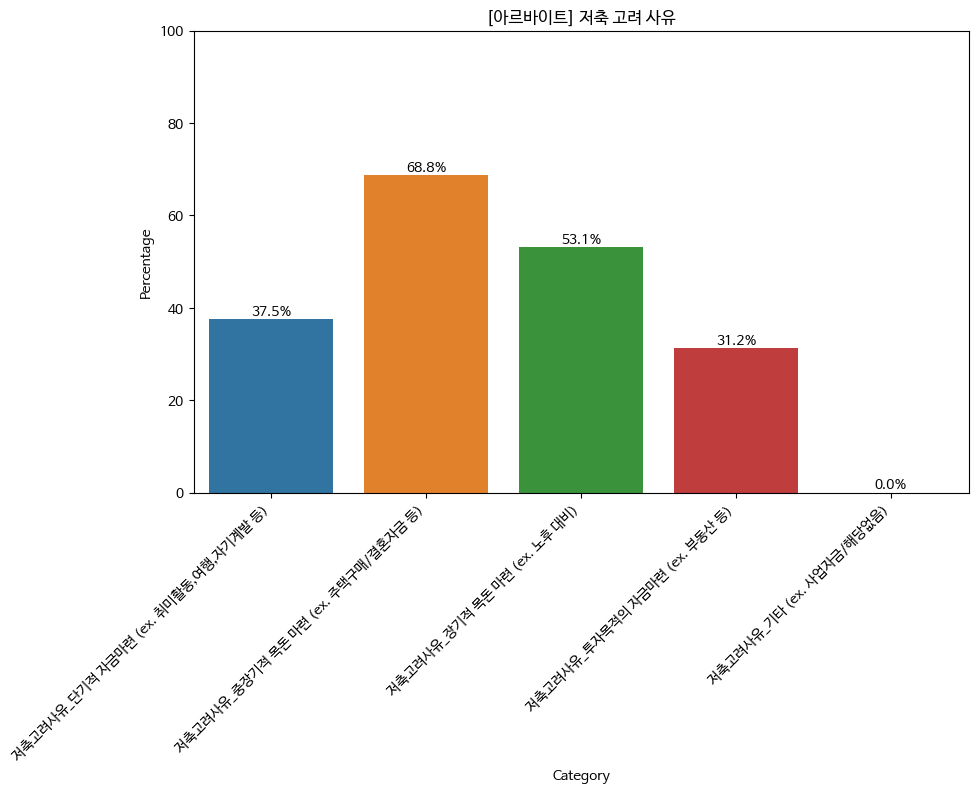

In [ ]:
tmp_half_work = tmp_df_2[tmp_df_2['직업군_전처리'] == '아르바이트'][one_hot_encoded_10.columns].reset_index(drop='index')

column_percentages = (tmp_half_work.sum() / len(tmp_half_work)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages,
                      order = ['저축고려사유_단기적 자금마련 (ex. 취미활동,여행,자기계발 등)', '저축고려사유_중장기적 목돈 마련 (ex. 주택구매/결혼자금 등)',
                               '저축고려사유_장기적 목돈 마련 (ex. 노후 대비)', '저축고려사유_투자목적의 자금마련 (ex. 부동산 등)',
                               '저축고려사유_기타 (ex. 사업자금/해당없음)'])

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('[아르바이트] 저축 고려 사유')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

### 3-13-2. 현재 자신의 상황에 부합하는 저축 방식 선택

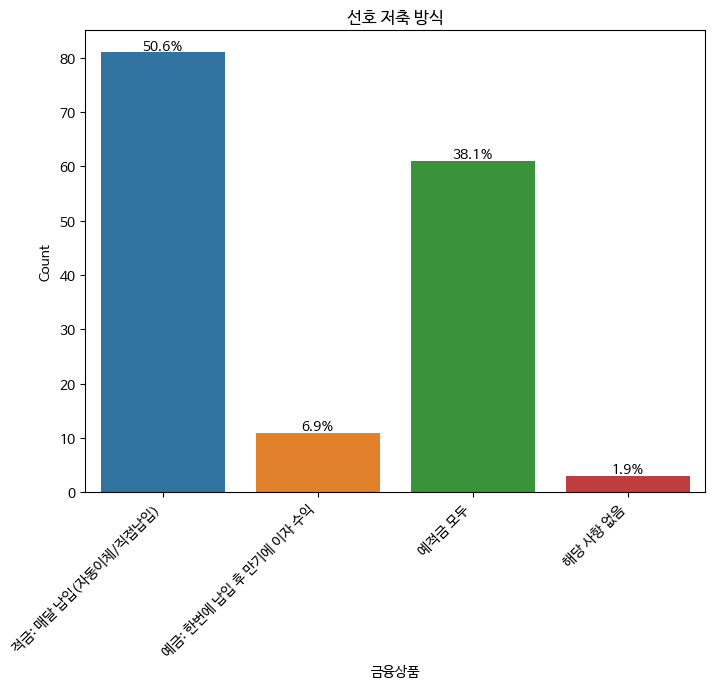

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='현재 자신의 상황에서 어떠한 저축 방식이 더 적합하다고 생각하시나요?', data=pre_customer_df)

total = len(pre_customer_df['현재 자신의 상황에서 어떠한 저축 방식이 더 적합하다고 생각하시나요?'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('선호 저축 방식')

plt.xlabel('금융상품')

plt.xticks(rotation=45, ha='right')

plt.ylabel('Count')

plt.show()

### [+] 직업군에 따른 선호 저축 방식

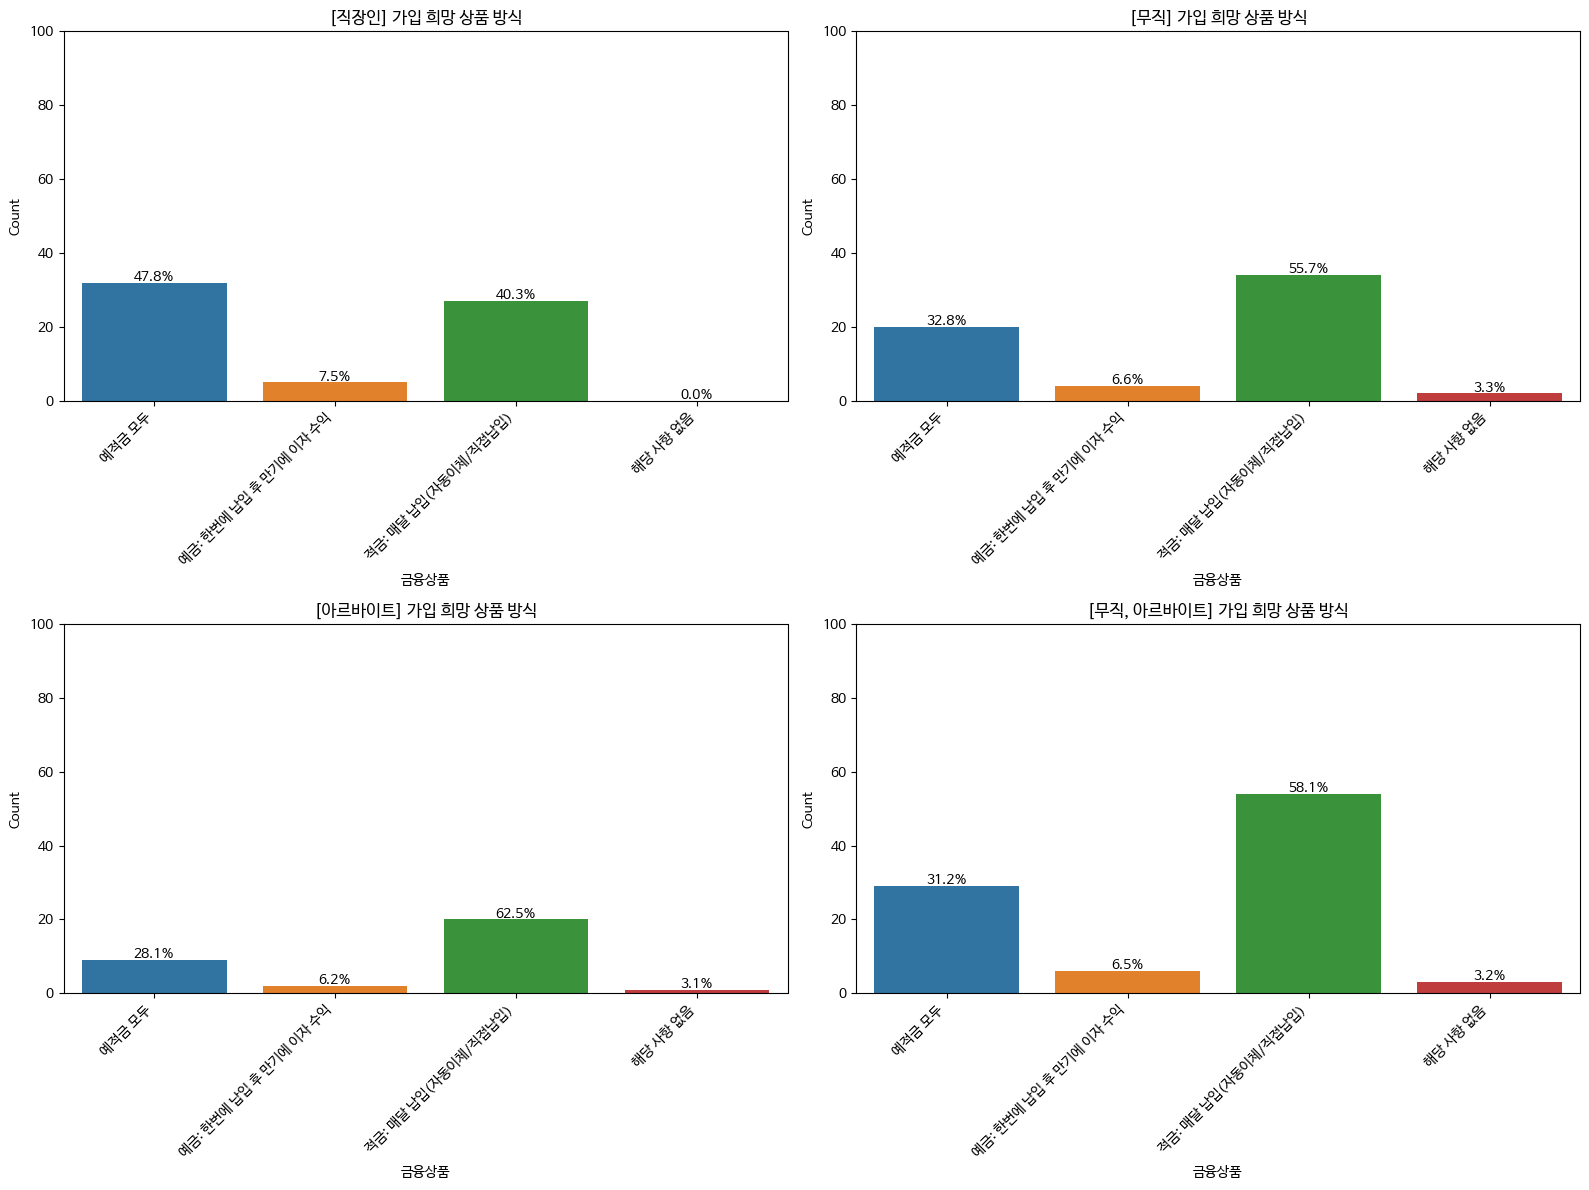

In [ ]:
filtered_dfs = {
    '직장인': pre_customer_df[pre_customer_df['직업군_전처리'] == '직장인'],
    '무직': pre_customer_df[pre_customer_df['직업군_전처리'] == '무직'],
    '아르바이트': pre_customer_df[pre_customer_df['직업군_전처리'] == '아르바이트'],
    '무직, 아르바이트': pre_customer_df[pre_customer_df['직업군_전처리'].isin(['아르바이트', '무직'])]
}

# 시각화
plt.figure(figsize=(16, 12))

for i, (title, df) in enumerate(filtered_dfs.items(), 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(
        x='현재 자신의 상황에서 어떠한 저축 방식이 더 적합하다고 생각하시나요?',
        data= df,
        order= ['예적금 모두', '예금: 한번에 납입 후 만기에 이자 수익', '적금: 매달 납입(자동이체/직접납입)',
               '해당 사항 없음']
    )

    total = len(df['현재 자신의 상황에서 어떠한 저축 방식이 더 적합하다고 생각하시나요?'])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) if total > 0 else '0%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 0.5
        ax.annotate(percentage, (x, y), ha='center')

    plt.title(f'[{title}] 가입 희망 상품 방식')
    plt.xlabel('금융상품')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.ylim(0, 100)

plt.tight_layout()
plt.show()

### 3-13-3. 금융상품 (저축) 희망 가입 기간

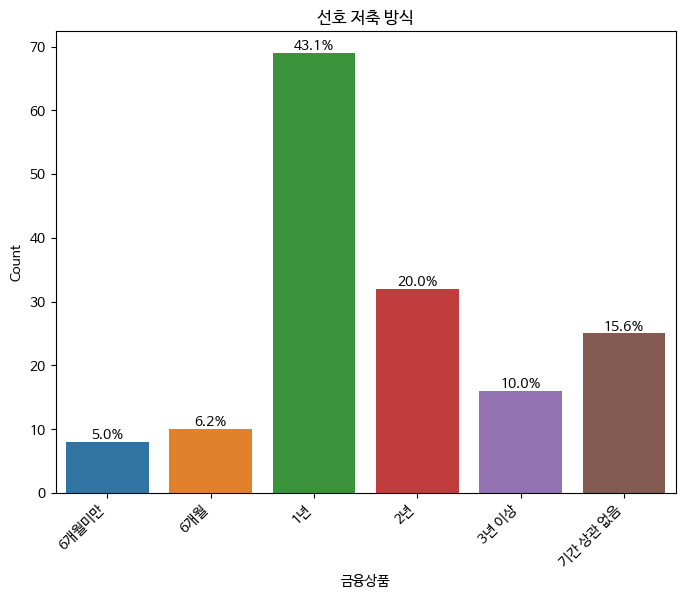

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='귀하가 희망하는 금융상품의 기간은 어떻게 되시나요?', data=pre_customer_df,
                   order = ['6개월미만', '6개월','1년','2년','3년 이상', '기간 상관 없음'])

total = len(pre_customer_df['귀하가 희망하는 금융상품의 기간은 어떻게 되시나요?'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('선호 저축 방식')

plt.xlabel('금융상품')

plt.xticks(rotation=45, ha='right')

plt.ylabel('Count')

plt.show()

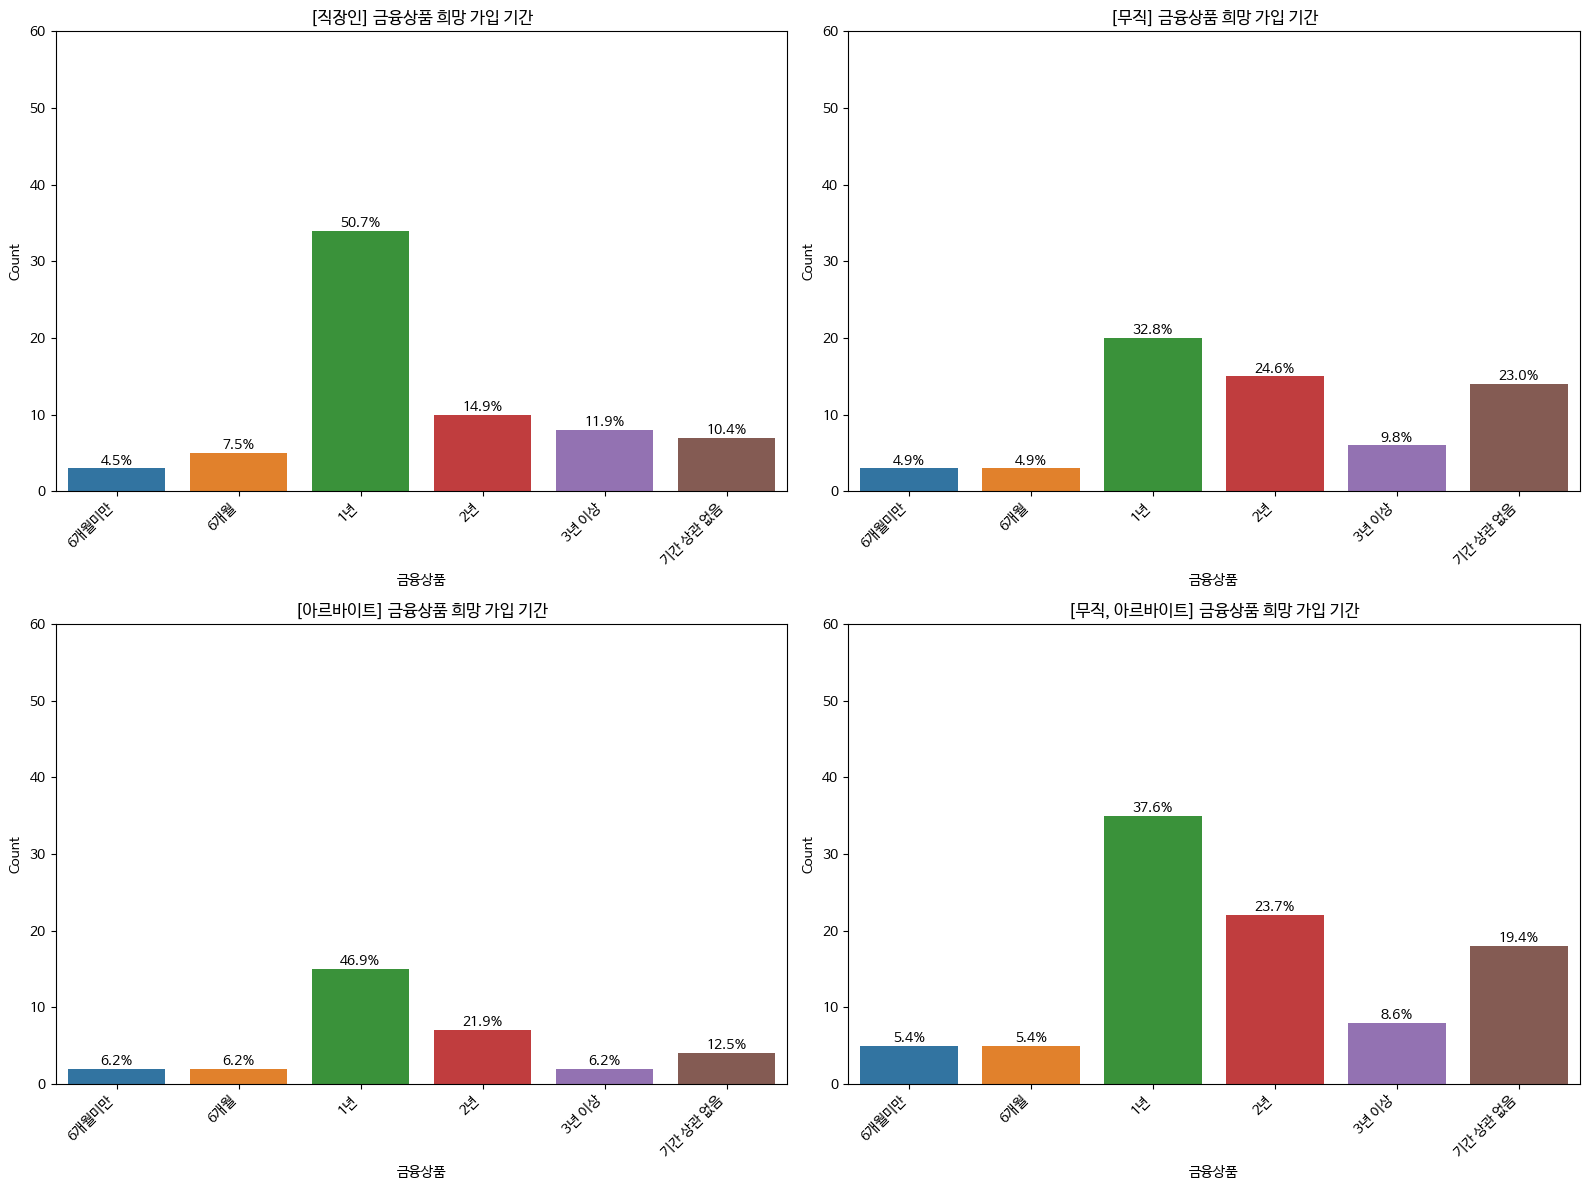

In [ ]:
filtered_dfs = {
    '직장인': pre_customer_df[pre_customer_df['직업군_전처리'] == '직장인'],
    '무직': pre_customer_df[pre_customer_df['직업군_전처리'] == '무직'],
    '아르바이트': pre_customer_df[pre_customer_df['직업군_전처리'] == '아르바이트'],
    '무직, 아르바이트': pre_customer_df[pre_customer_df['직업군_전처리'].isin(['아르바이트', '무직'])]
}

# 시각화
plt.figure(figsize=(16, 12))

for i, (title, df) in enumerate(filtered_dfs.items(), 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(
        x='귀하가 희망하는 금융상품의 기간은 어떻게 되시나요?',
        data= df,
        order = ['6개월미만', '6개월','1년','2년','3년 이상', '기간 상관 없음']
    )

    total = len(df['귀하가 희망하는 금융상품의 기간은 어떻게 되시나요?'])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) if total > 0 else '0%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 0.5
        ax.annotate(percentage, (x, y), ha='center')

    plt.title(f'[{title}] 금융상품 희망 가입 기간')
    plt.xlabel('금융상품')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.ylim(0, 60)

plt.tight_layout()
plt.show()

### 3-13-4. 높은 수익률을 위한 주거래 은행 이외의 선택 가능성 파악


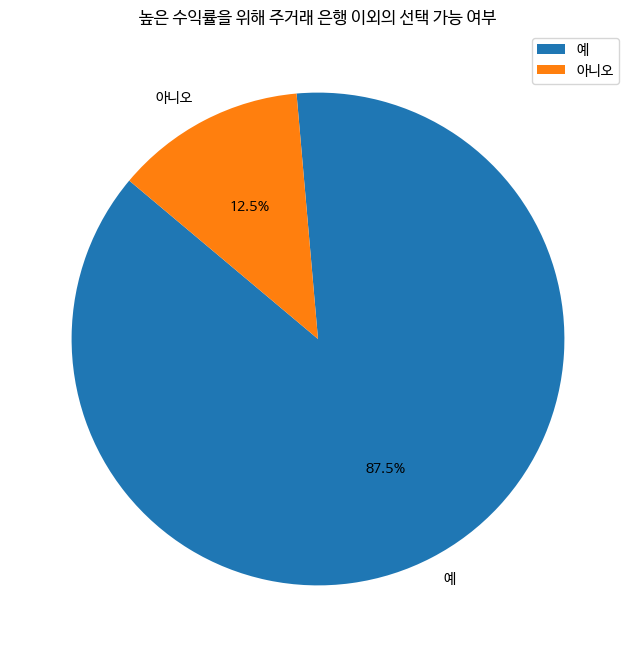

In [ ]:
main_bank = pre_customer_df['주거래 은행보다 수익률이 더 높은 상품이 있다면  타 은행으로 신규 상품을 가입할 의향이 있으신가요?'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(main_bank, labels=main_bank.index, autopct='%1.1f%%', startangle=140)
plt.title('높은 수익률을 위해 주거래 은행 이외의 선택 가능 여부')
plt.legend()
plt.show()

### 3-13-5. 허용 가능 은행권 (1금융권, 1 + 2금융권) 파악

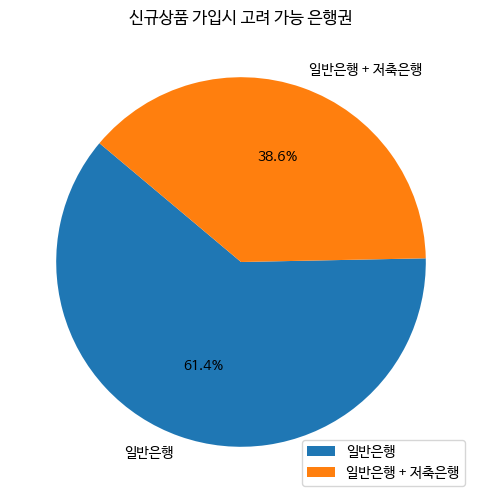

In [ ]:
bank_range = pre_customer_df['신규 상품을 가입할 경우, 허용할 수 있는 금융권의 범위를 선택해주세요.'].value_counts()

plt.figure(figsize=(12, 6))
plt.pie(bank_range, labels=bank_range.index, autopct='%1.1f%%', startangle=140)
plt.title('신규상품 가입시 고려 가능 은행권')
plt.legend(loc='lower right')
plt.show()

### [+] 직업군별 허용 가능 은행권 (1금융권, 1 + 2금융권) 파악

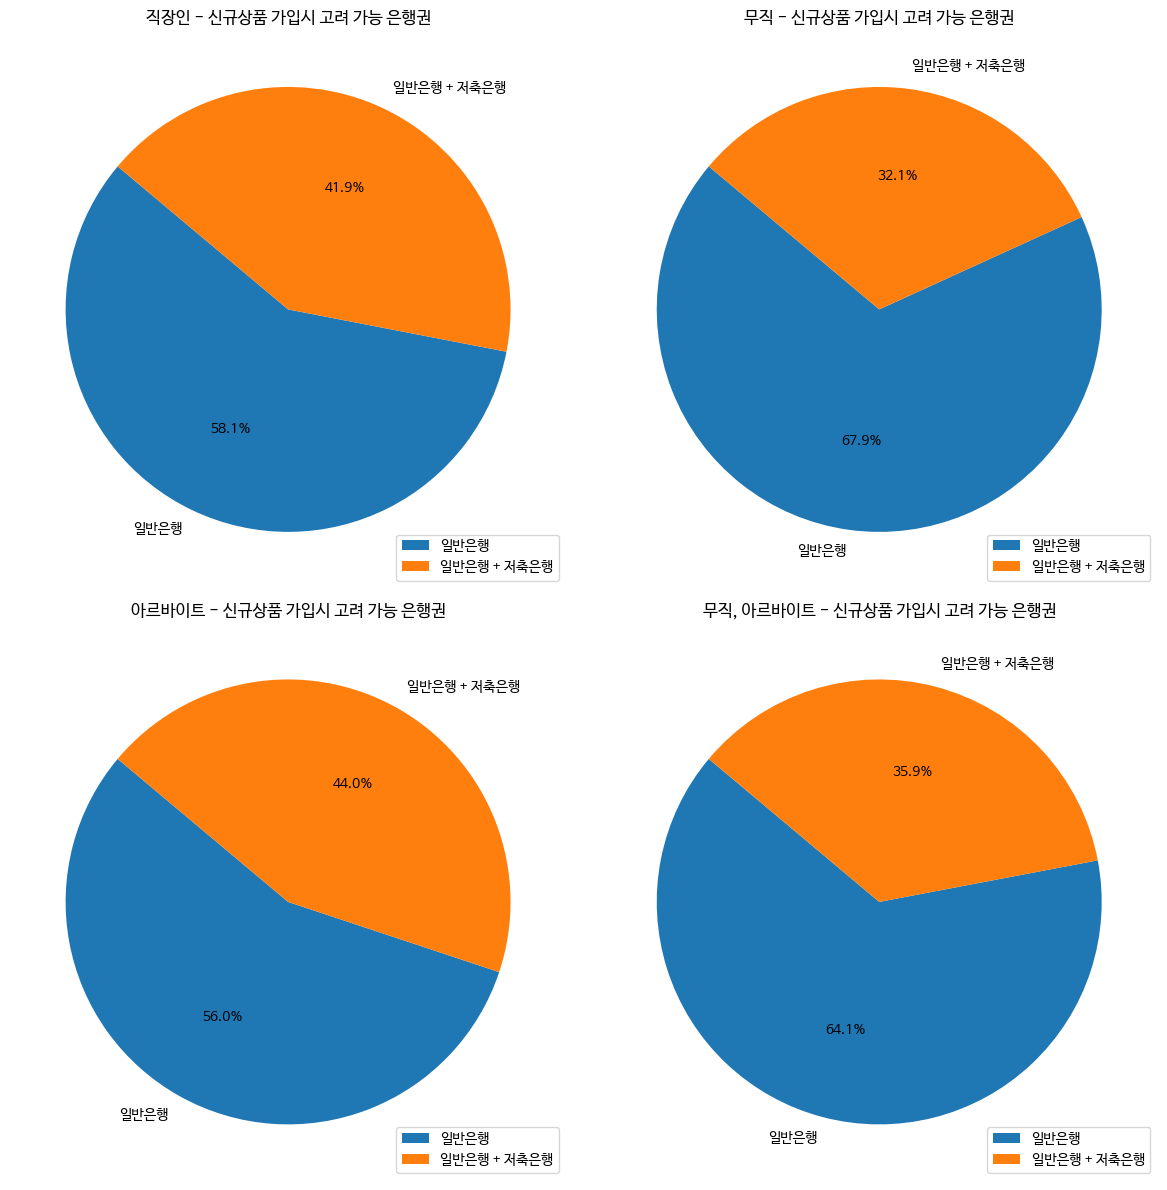

In [ ]:
job_categories = ['직장인', '무직', '아르바이트', ['무직', '아르바이트']]
plt.figure(figsize=(12, 12))

for i, category in enumerate(job_categories, 1):
    plt.subplot(2, 2, i)
    if isinstance(category, list):
        df_filtered = pre_customer_df[pre_customer_df['직업군_전처리'].isin(category)]
        title = '무직, 아르바이트'
    else:
        df_filtered = pre_customer_df[pre_customer_df['직업군_전처리'] == category]
        title = category

    bank_range = df_filtered['신규 상품을 가입할 경우, 허용할 수 있는 금융권의 범위를 선택해주세요.'].value_counts()
    plt.pie(bank_range, labels=bank_range.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'{title} - 신규상품 가입시 고려 가능 은행권')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### 3-13-6. 선호 가입 방식

In [ ]:
one_hot_encoded_7 = pre_customer_df['귀하가 선호하는 금융상품의 가입방식을 선택해주세요.'].str.split(', ', expand=True).stack().str.get_dummies().sum(level=0)
one_hot_encoded_7 = one_hot_encoded_7.add_prefix('선호가입방식_')

one_hot_encoded_7.head()

,선호가입방식_상관 없음,선호가입방식_오프라인(영업점 방문),선호가입방식_온라인(스마트폰/인터넷)
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


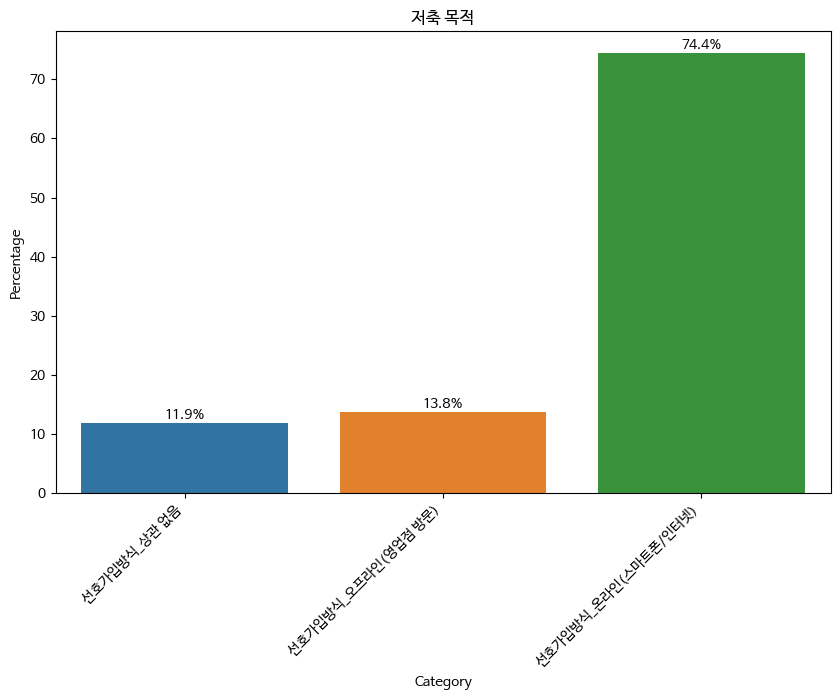

In [ ]:
column_percentages = (one_hot_encoded_7.sum() / len(one_hot_encoded_7)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('저축 목적')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

### 3-13-7. 선호 우대 가입 조건

In [ ]:
one_hot_encoded_8 = pre_customer_df['새로운 상품 가입 시 우대금리를 위해 감수할 수 있는 옵션들을 모두 선택해주세요'].str.split(', ', expand=True).stack().str.get_dummies().sum(level=0)
one_hot_encoded_8 = one_hot_encoded_8.add_prefix('선호우대방식_')
one_hot_encoded_8['기타 (타 상품 가입, 어플리케이션 설치, 회원가입 등)'] = one_hot_encoded_8['선호우대방식_기타 (타 상품 가입'] + one_hot_encoded_8['선호우대방식_어플리케이션 설치'] + one_hot_encoded_8['선호우대방식_회원가입 등)']
one_hot_encoded_8.drop(['선호우대방식_기타 (타 상품 가입', '선호우대방식_어플리케이션 설치', '선호우대방식_회원가입 등)'], axis = 1, inplace = True)
one_hot_encoded_8.head()

,선호우대방식_급여이체 설정,선호우대방식_마케팅 동의 설정,선호우대방식_온라인(인터넷/스마트폰) 가입시 우대,선호우대방식_일정 금액 이상 (전월)카드실적 충족,선호우대방식_자동이체 설정,선호우대방식_직접 영업점 방문가입시 우대,선호우대방식_해당 금융사 신규 가입(최초 거래),선호우대방식_해당 금융사 주택청약 신규 가입(기존 보유),"기타 (타 상품 가입, 어플리케이션 설치, 회원가입 등)"
0,1,1,1,1,1,0,0,0,0
1,0,0,1,1,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,1,0,0
4,1,1,1,1,1,1,0,0,0


In [ ]:
new_column_order = [
    '선호우대방식_급여이체 설정',
    '선호우대방식_자동이체 설정',
    '선호우대방식_마케팅 동의 설정',
    '선호우대방식_일정 금액 이상 (전월)카드실적 충족',
    '선호우대방식_온라인(인터넷/스마트폰) 가입시 우대',
    '선호우대방식_직접 영업점 방문가입시 우대',
    '선호우대방식_해당 금융사 신규 가입(최초 거래)',
    '선호우대방식_해당 금융사 주택청약 신규 가입(기존 보유)',
    '기타 (타 상품 가입, 어플리케이션 설치, 회원가입 등)'
]
one_hot_encoded_8 = one_hot_encoded_8[new_column_order]

one_hot_encoded_8.columns

Index(['선호우대방식_급여이체 설정', '선호우대방식_자동이체 설정', '선호우대방식_마케팅 동의 설정',
       '선호우대방식_일정 금액 이상 (전월)카드실적 충족', '선호우대방식_온라인(인터넷/스마트폰) 가입시 우대',
       '선호우대방식_직접 영업점 방문가입시 우대', '선호우대방식_해당 금융사 신규 가입(최초 거래)',
       '선호우대방식_해당 금융사 주택청약 신규 가입(기존 보유)', '기타 (타 상품 가입, 어플리케이션 설치, 회원가입 등)'],
      dtype='object')

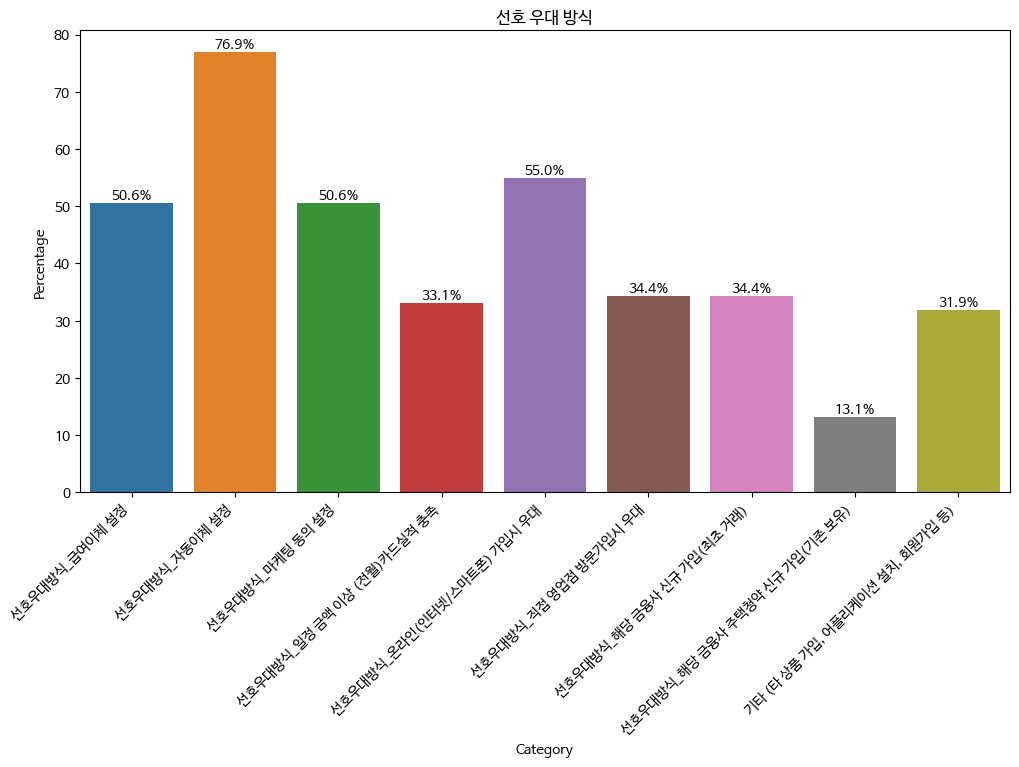

In [ ]:
column_percentages = (one_hot_encoded_8.sum() / len(one_hot_encoded_8)) * 100
column_percentages = column_percentages.reset_index()
column_percentages.columns = ['Category', 'Percentage']

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Category', y='Percentage', data=column_percentages)

# annotations
for p in barplot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    barplot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('선호 우대 방식')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()